# Jesper IRSB vs Cruz cluster Cepheid

In [11]:
import pandas as pd
jesper = pd.read_csv('data/input/90_QLT3.csv')
#radial velocity and photometry for IRSB ralial voelocity, V and K band
jesper = jesper.sort_values(by = ['logP'],ascending=True).dropna().reset_index()
jesper = jesper[['name', 'logP', 'IRSB', 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag', 'Wvi','Wjk']]
#jesper.style

In [12]:
mag = ['B','V','I','J','H','K'];
extinction_ratios = {'B': 1.31, 'V': 1.0, 'I': 0.608,'J': 0.292,'H': 0.181,'K': 0.119 }   
R_v = 3.23
R=[]
for i in mag:
    R.append(extinction_ratios[i]*R_v)
print(R)
def R_(R, mag=mag):
    R_ = {}
    for c,m in enumerate(mag):
        for a,c1 in enumerate(mag):
            for b,c2 in enumerate(mag[a+1:]):
                R_[m+c1+c2] = R[c] / (R[a] - R[a+1:][b])
    return R_
R_ = R_(R)
color = pd.DataFrame()
color['name']=jesper['name']
color['logP']=jesper['logP']
color['mM0_IRSB']=jesper['IRSB']
color['EBV']=jesper['EBV']

for i in range(0,6):
    for j in range(i+1,6):
        color[mag[i]+mag[j]] = jesper[mag[i]+'_mag'] - jesper[mag[j]+'_mag'] - (R[i]-R[j])*jesper.EBV
#color

[4.2313, 3.23, 1.96384, 0.9431599999999999, 0.58463, 0.38437]


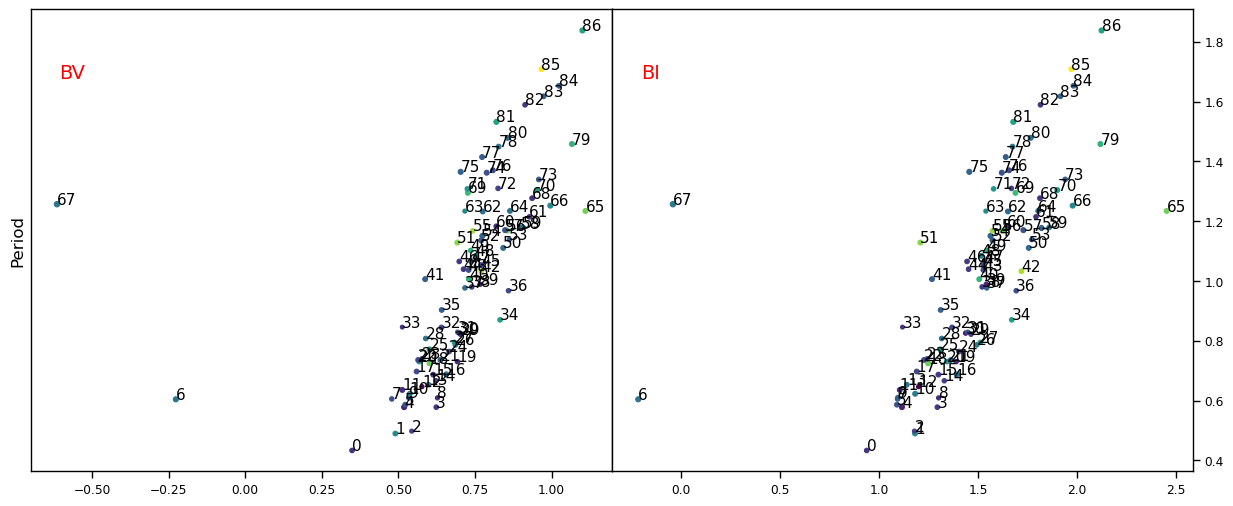

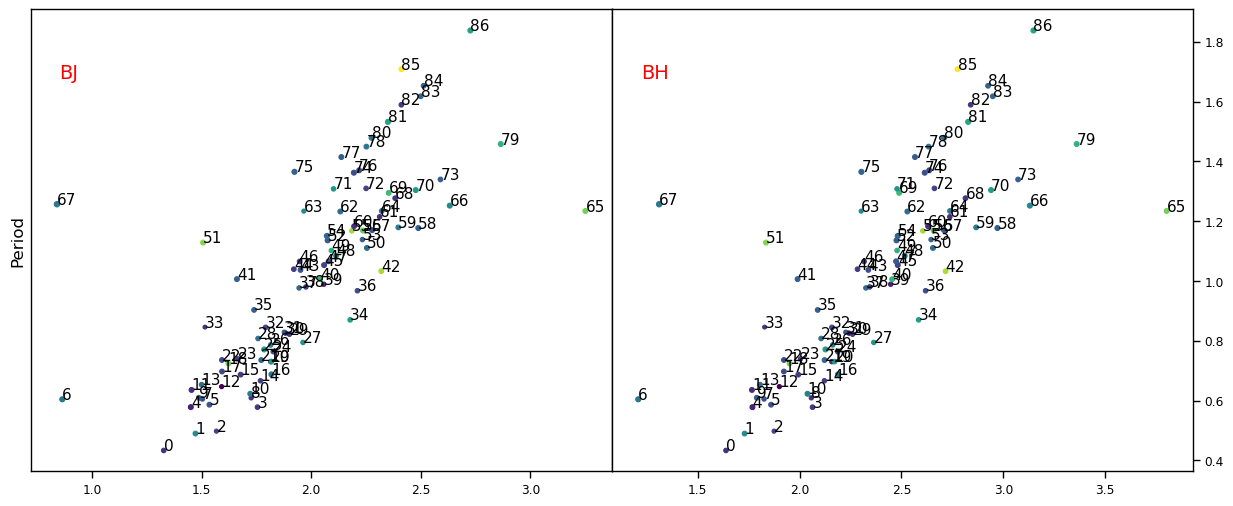

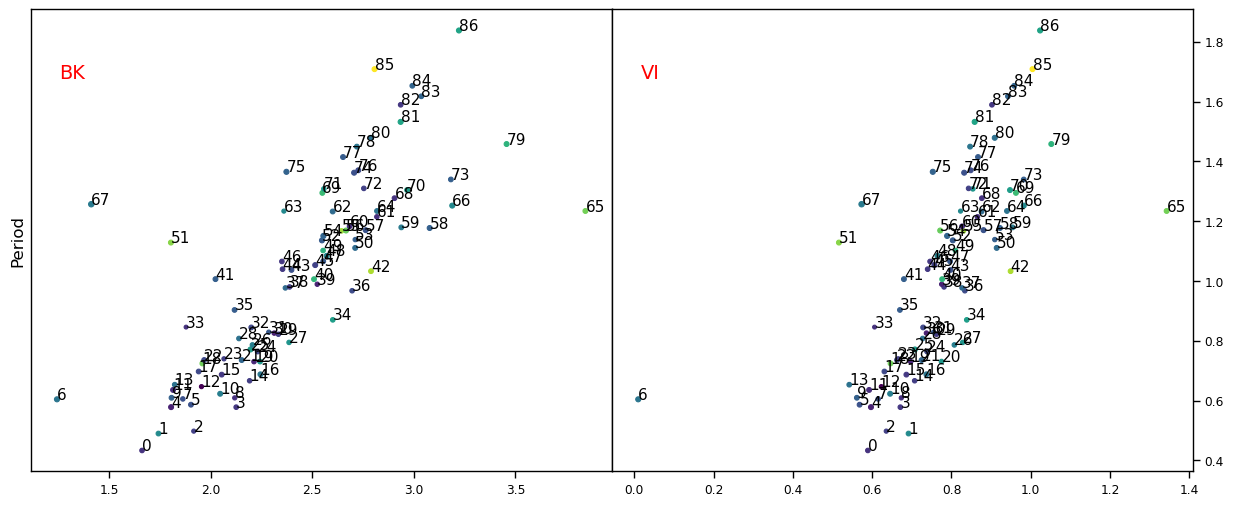

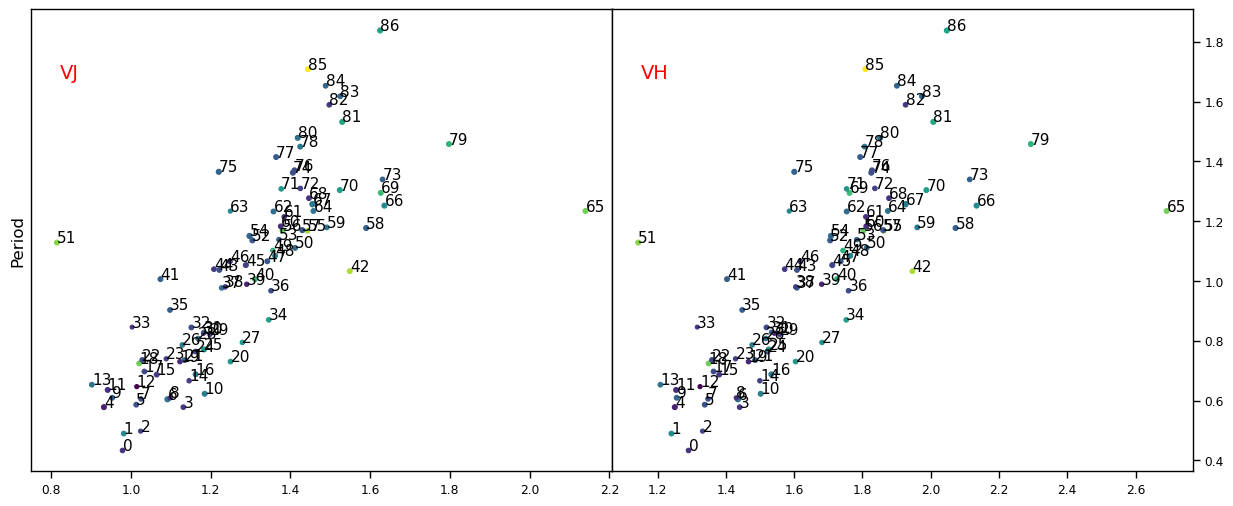

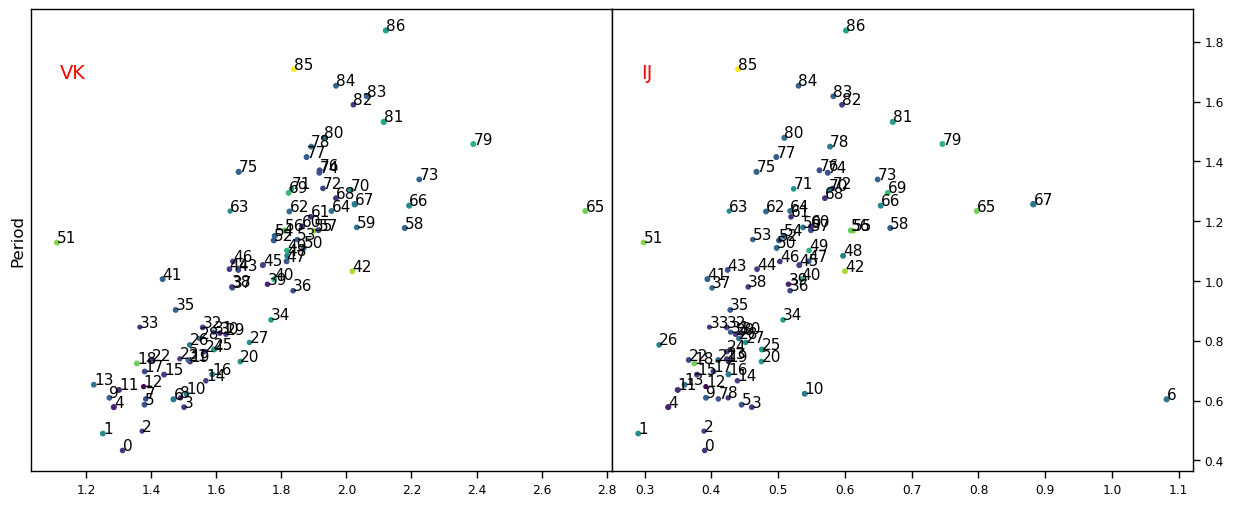

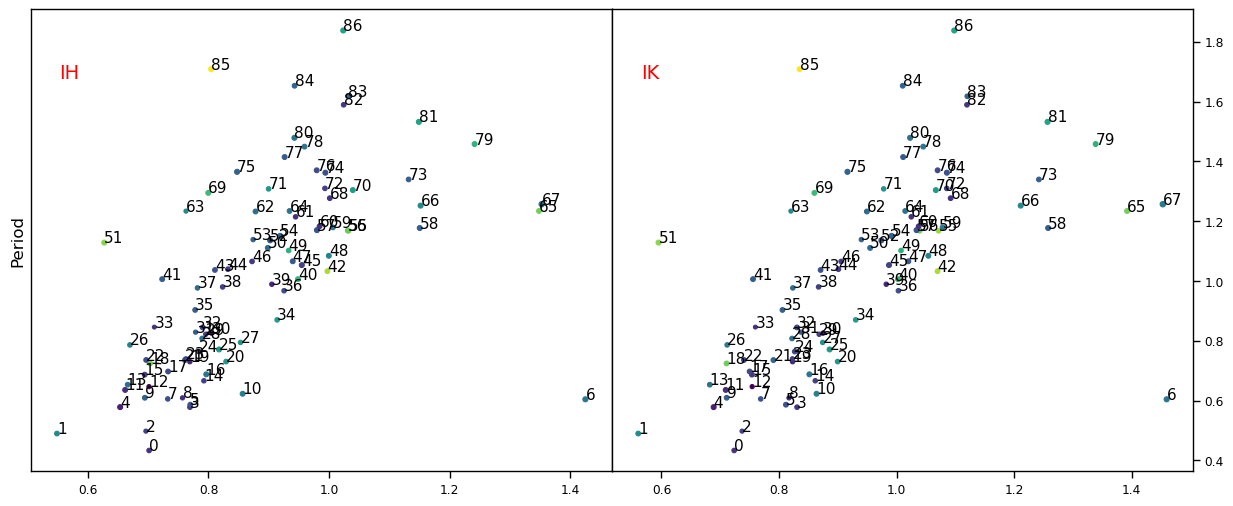

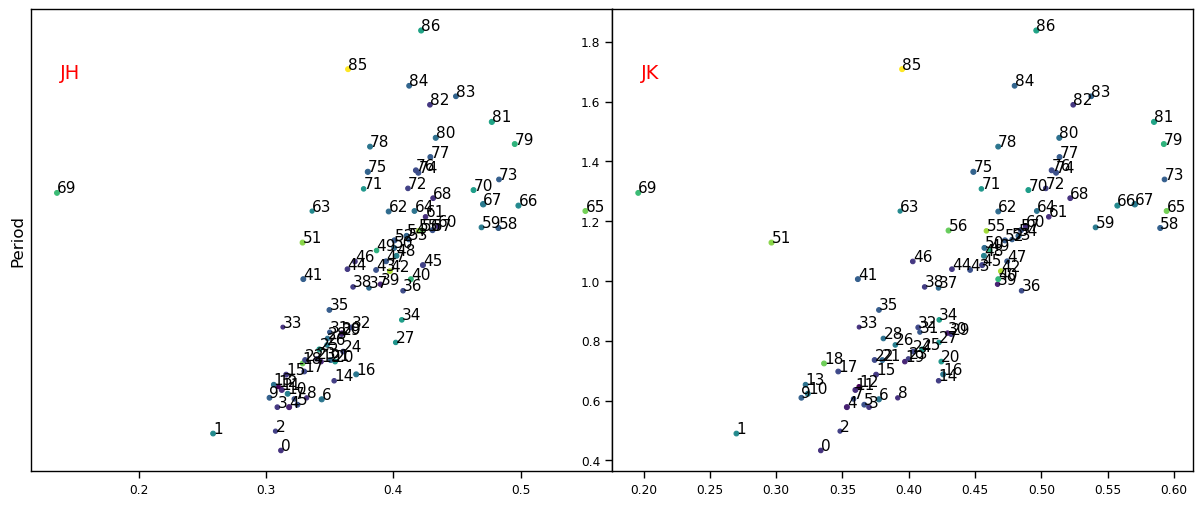

In [27]:
import matplotlib.pyplot as plt
ls = color.columns[4:]

#outliers = [m for m in range(len(color))]
for j in range(0,14,2):
    fig, axarr = plt.subplots(1,2, sharey='col',gridspec_kw={'hspace': 0, 'wspace': 0})
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    Y = color['logP']
    for i,ax in enumerate(axarr):
#        ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
        X = color[ls[i+j]]
        pcm = ax.scatter(X, Y, label='$%s$'%(ls[i+j]), s=jesper['IRSB'], c = jesper['EBV'])
        #ax.legend(loc='upper right', prop={'size':6})
        ax.yaxis.tick_right()
        for k in range(len(jesper)):
            ax.annotate('%i'%(k), xy =(X.iloc[k], Y.iloc[k]), fontsize = 11) 
        if i%2 ==0:
            ax.set_ylabel('Period')
        plt.text(0.05, 0.85, '%s'%(ls[i+j]), transform = ax.transAxes, color = "red",  fontsize = 14)      
    #save('PC%i_%s'%(j,ls[i+j]))
ax.yaxis.tick_left()

In [13]:
outliers = [0,1,6,10,26,33,41,51,58,63,65,66,67,69,73,75,79,81,83,84,85,86]
je = jesper.drop(index = outliers).reset_index()
je
deldel_outlier=[14, 18, 28]
j = je.drop(index = deldel_outlier).reset_index()
j.to_csv('data/input/62_gold.csv')
j

level_0  index   name      logP    IRSB    EBV   B_mag  V_mag  I_mag  \
0         0      2  SZTau  0.498166   8.814  0.295   7.365  6.526  5.517   
1         1      3  QZNor  0.578244  10.811  0.263   9.756  8.869  7.865   
2         2      4  ADGem  0.578408  12.514  0.173  10.547  9.855  9.039   
3         3      5   YAur  0.586529  11.682  0.375  10.512  9.614  8.571   
4         4      7  STTau  0.605768  10.249  0.368   9.066  8.219  7.138   
..      ...    ...    ...       ...     ...    ...     ...    ...    ...   
57       60     76  SWVel  1.370016  11.976  0.344   9.281  8.128  6.844   
58       61     77   XPup  1.414321  12.192  0.421   9.702  8.507  7.107   
59       62     78  RYVel  1.449158  11.812  0.545   9.744  8.371  6.834   
60       63     80  AQPup  1.478624  12.544  0.518  10.081  8.705  7.140   
61       64     82   UCar  1.588970  10.752  0.263   7.469  6.292  5.057   

    J_mag  H_mag  K_mag    Wvi    Wjk  
0   4.827  4.414  4.314 -4.861 -4.853  
1   7.136  6.733  6.619 -4.503 -4.547  
2   8.527  8.147  8.077 -4.740 -4.746  
3   7.743  7.284  7.167 -4.728 -4.911  
4   6.352  5.898  5.788 -4.788 -4.849  
..    ...    ...    ...    ...    ...  
57  5.931  5.390  5.231 -7.124 -7.227  
58  6.180  5.600  5.431 -7.256 -7.276  
59  5.700  5.123  4.928 -7.361 -7.415  
60  6.102  5.483  5.299 -7.832 -7.797  
61  4.193  3.670  3.522 -7.610 -7.690  

[62 rows x 14 columns]

In [14]:
je

index   name      logP    IRSB    EBV   B_mag  V_mag  I_mag  J_mag  H_mag  \
0       2  SZTau  0.498166   8.814  0.295   7.365  6.526  5.517  4.827  4.414   
1       3  QZNor  0.578244  10.811  0.263   9.756  8.869  7.865  7.136  6.733   
2       4  ADGem  0.578408  12.514  0.173  10.547  9.855  9.039  8.527  8.147   
3       5   YAur  0.586529  11.682  0.375  10.512  9.614  8.571  7.743  7.284   
4       7  STTau  0.605768  10.249  0.368   9.066  8.219  7.138  6.352  5.898   
..    ...    ...       ...     ...    ...     ...    ...    ...    ...    ...   
60     76  SWVel  1.370016  11.976  0.344   9.281  8.128  6.844  5.931  5.390   
61     77   XPup  1.414321  12.192  0.421   9.702  8.507  7.107  6.180  5.600   
62     78  RYVel  1.449158  11.812  0.545   9.744  8.371  6.834  5.700  5.123   
63     80  AQPup  1.478624  12.544  0.518  10.081  8.705  7.140  6.102  5.483   
64     82   UCar  1.588970  10.752  0.263   7.469  6.292  5.057  4.193  3.670   

    K_mag    Wvi    Wjk  
0   4.314 -4.861 -4.853  
1   6.619 -4.503 -4.547  
2   8.077 -4.740 -4.746  
3   7.167 -4.728 -4.911  
4   5.788 -4.788 -4.849  
..    ...    ...    ...  
60  5.231 -7.124 -7.227  
61  5.431 -7.256 -7.276  
62  4.928 -7.361 -7.415  
63  5.299 -7.832 -7.797  
64  3.522 -7.610 -7.690  

[65 rows x 13 columns]

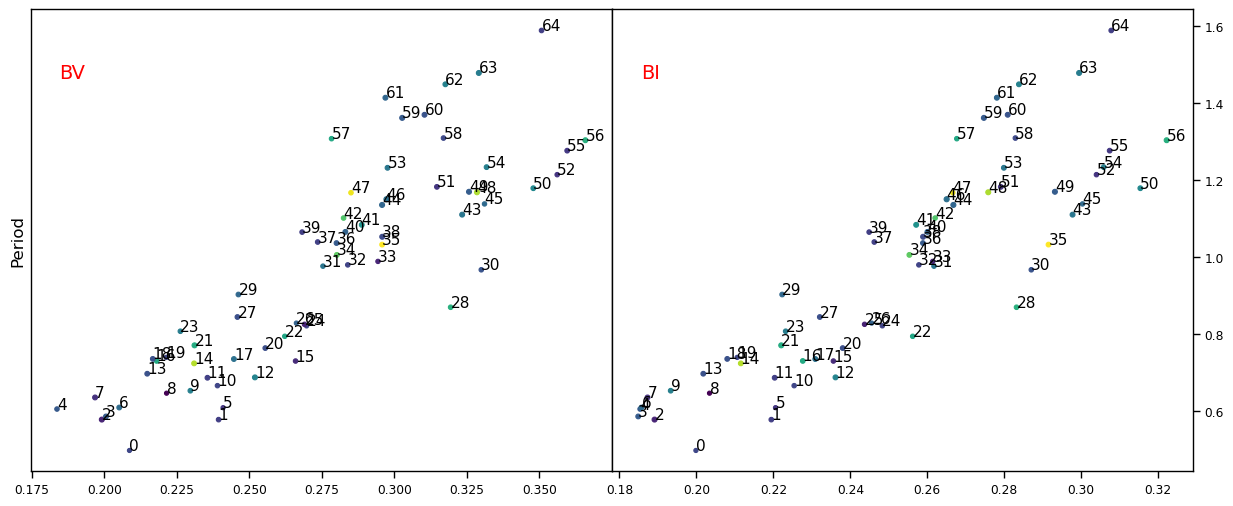

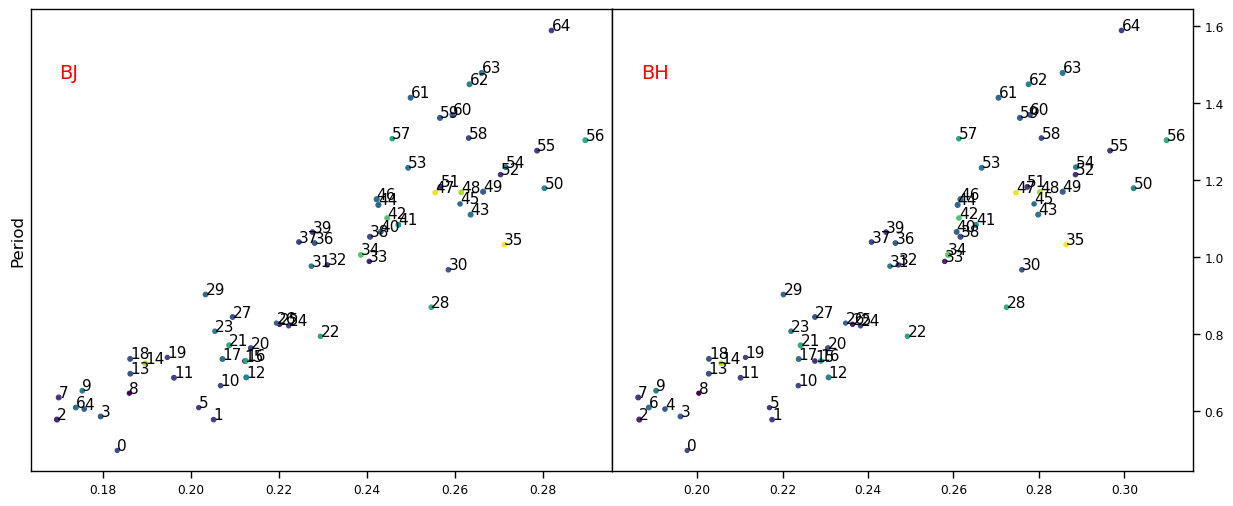

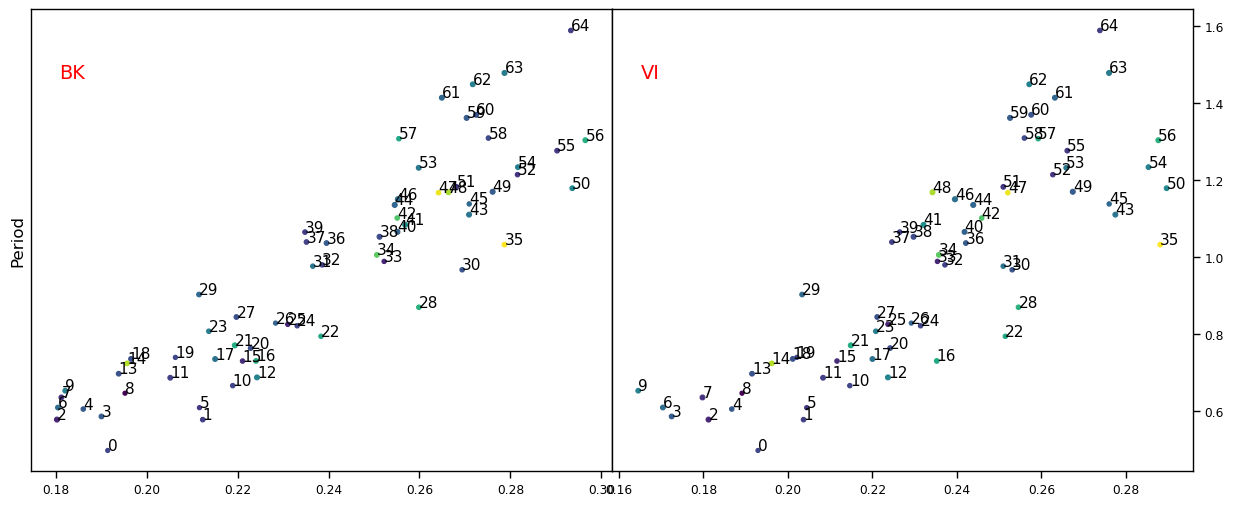

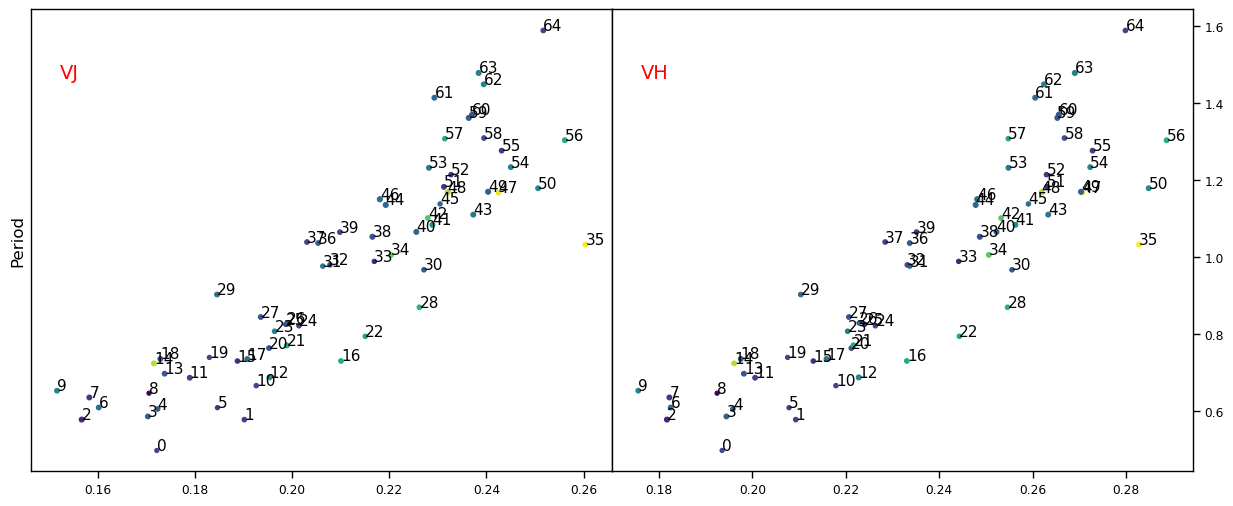

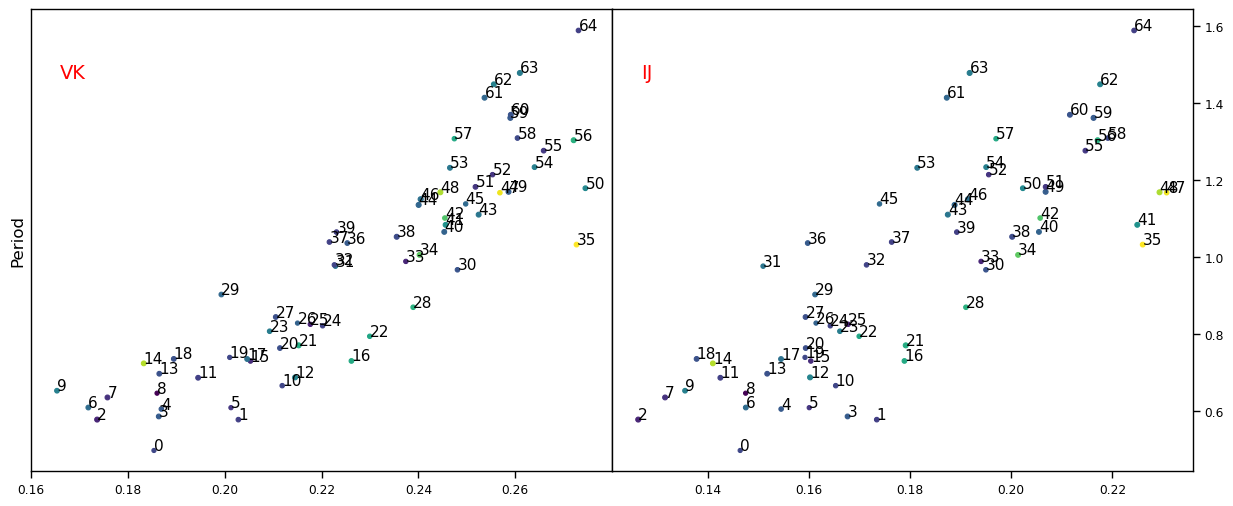

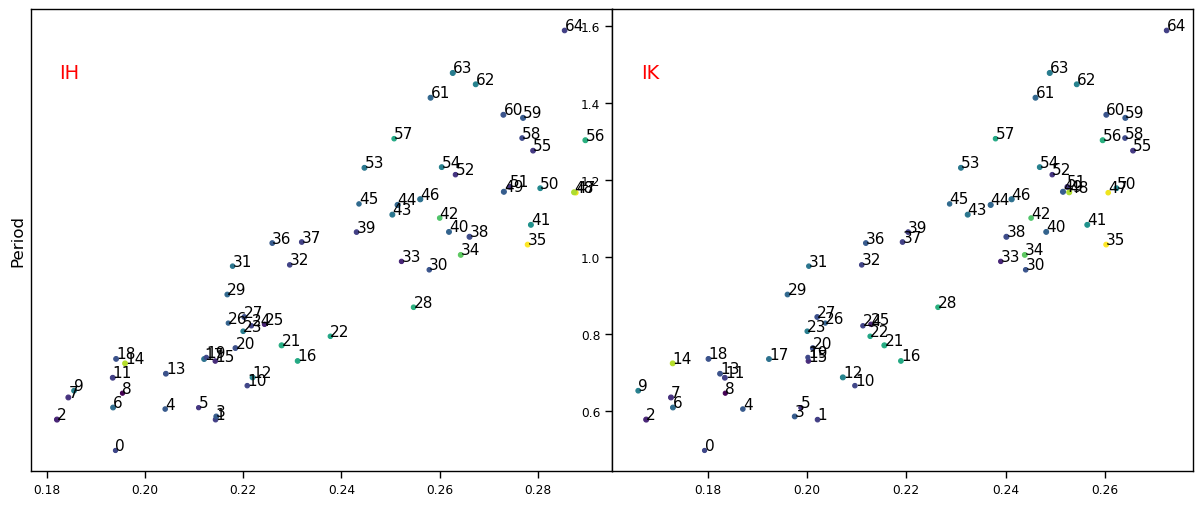

In [33]:
color = pd.DataFrame()
color['name']=je['name']
color['logP']=je['logP']
#color['mM0_IRSB']=je['mM0_IRSB']
#color['EBV']=je['EBV']
for i in range(0,6):
    for j in range(i+1,6):
        color[mag[i]+mag[j]] = je[mag[i]+'_mag'] - je[mag[j]+'_mag'] - (R[i]-R[j])*je.EBV

import matplotlib.pyplot as plt
ls = color.columns[2:]

#outliers = [m for m in range(len(color))]
for j in range(0,12,2):
    fig, axarr = plt.subplots(1,2, sharey='col',gridspec_kw={'hspace': 0, 'wspace': 0})
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    Y = color['logP']
    for i,ax in enumerate(axarr):
#        ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
        X = R_[f'K{ls[i+j]}']*color[ls[i+j]]
        pcm = ax.scatter(X, Y, label='$%s$'%(ls[i+j]), s=je['IRSB'], c = je['EBV'])
        #ax.legend(loc='upper right', prop={'size':6})
        ax.yaxis.tick_right()
        for k in range(len(je)):
            ax.annotate('%i'%(k), xy =(X.iloc[k], Y.iloc[k]), fontsize = 11) 
        if i%2 ==0:
            ax.set_ylabel('Period')
        plt.text(0.05, 0.85, '%s'%(ls[i+j]), transform = ax.transAxes, color = "red",  fontsize = 14)      
    #save('PC%i_%s'%(j,ls[i+j]))
ax.yaxis.tick_left()


In [6]:
gold = je[['name', 'logP', 'IRSB', 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag', 'Wvi','Wjk']]

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
dev_bi = wesenheit[f'KJK_j']-je['Wjk']
dev_vi = wesenheit[f'VVI_j']-je['Wvi']
plt.plot(wesenheit['logP'],dev_vi, 'b.',label = f'$\Delta W_V,VI | \sigma = {dev_vi.std() :.3f}$')
plt.plot(wesenheit['logP'],dev_bi, 'y.', label = f'$\Delta W_B,BI | \sigma = {dev_bi.std() :.3f}$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title('Deviation in V,VI and B,BI wesenheit (Shubham - Fouque)')
plt.ylabel(f'W,S - W,F')
plt.show()

NameError: name 'wesenheit' is not defined

<Figure size 1200x400 with 0 Axes>

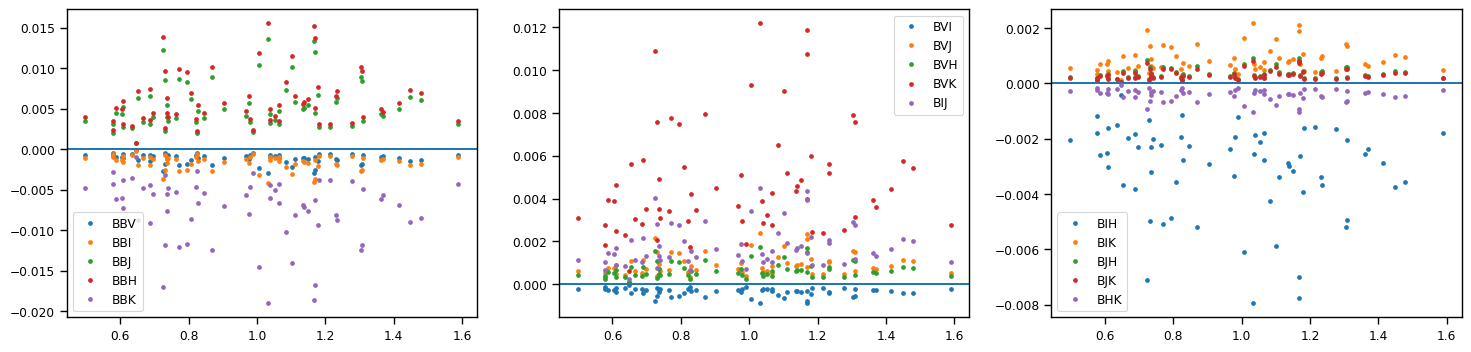

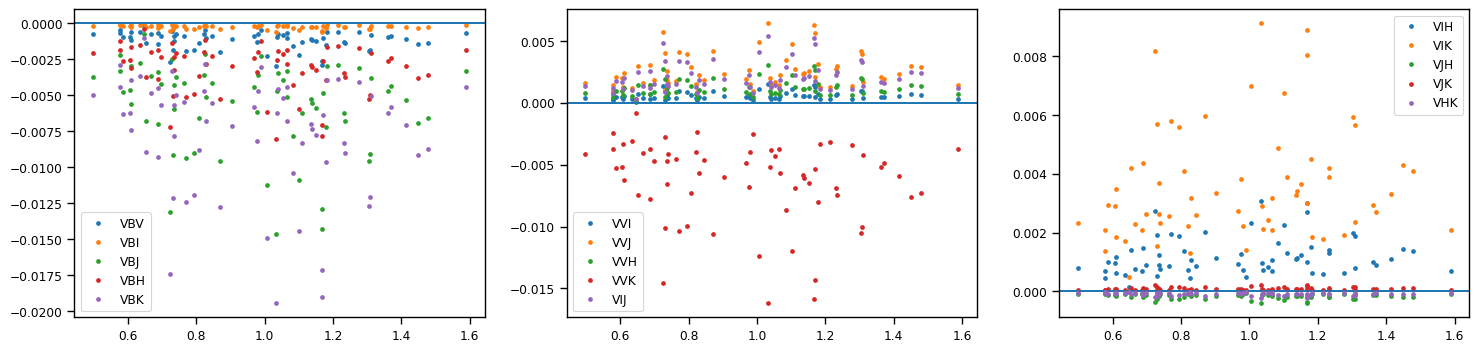

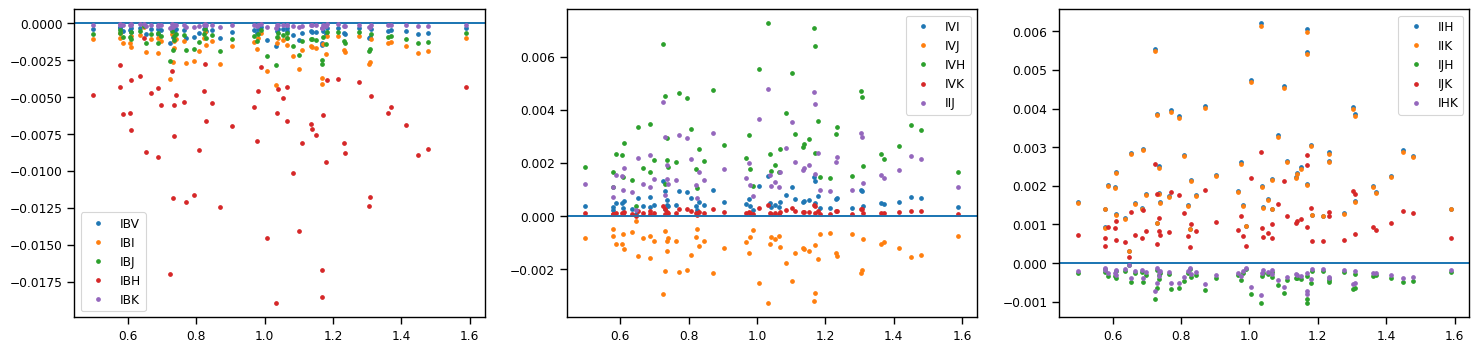

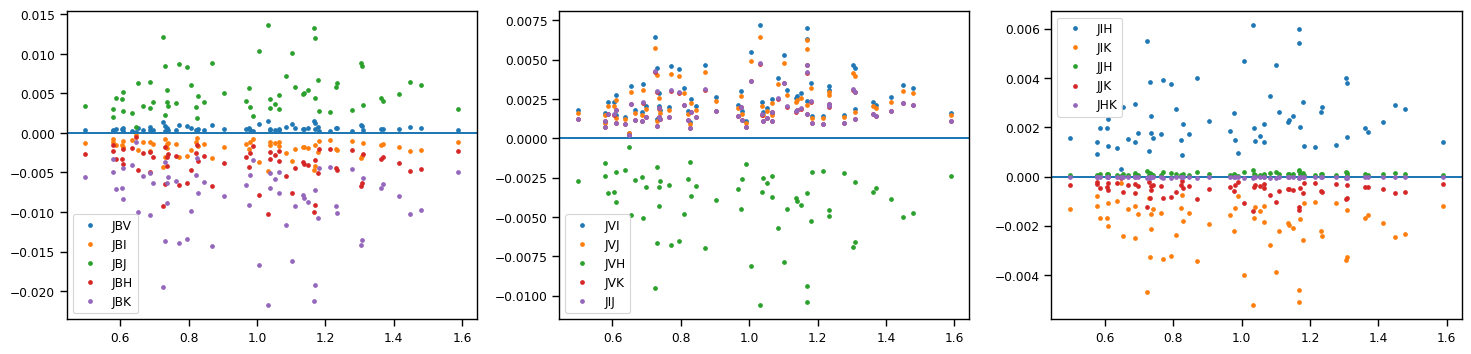

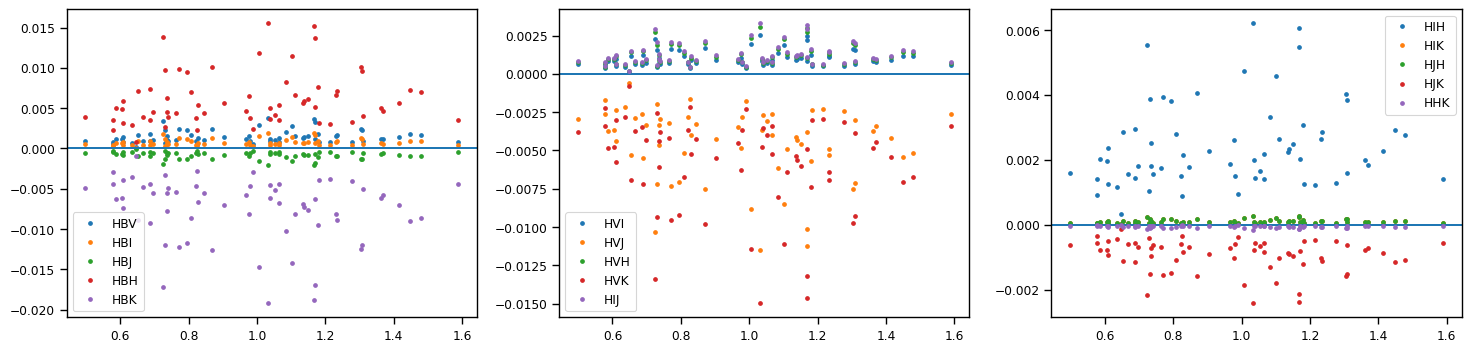

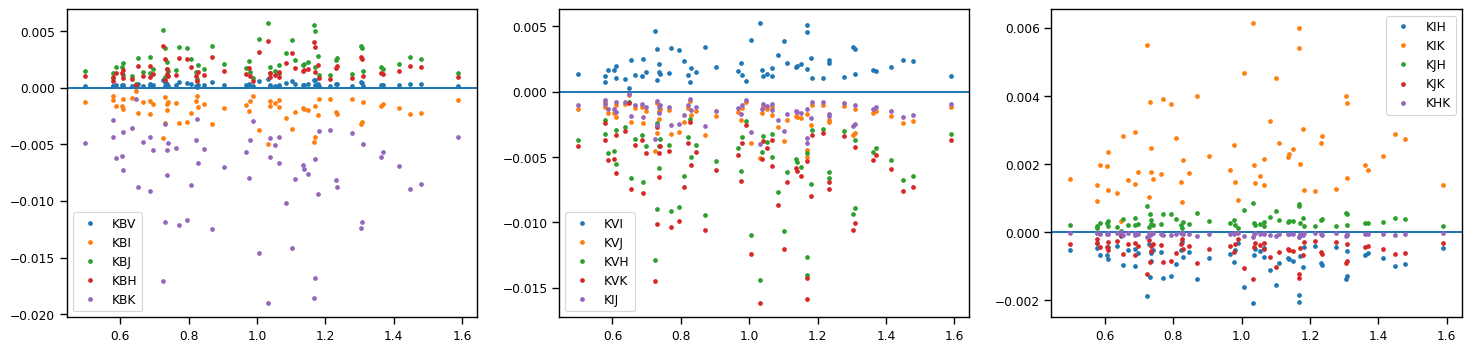

In [10]:
import matplotlib.pyplot as plt
from lvtlaw.a_utils import imgsave 
m='B'
def pltwes(m):
    fig_res, axs_res = plt.subplots(1, 3, figsize=(18, 4))
    axs_res = axs_res.flatten()
    for col in range(5):
        dev = wesenheit[f'{m}{wes_show[col]}_j']-wesenheit[f'{m}{wes_show[col]}_j0']
        axs_res[0].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[0].plot(wesenheit.logP, dev, '.', label =m+wes_show[col])
        dev = wesenheit[f'{m}{wes_show[col+5]}_j']-wesenheit[f'{m}{wes_show[col+5]}_j0']
        axs_res[1].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[1].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+5])
        dev = wesenheit[f'{m}{wes_show[col+10]}_j']-wesenheit[f'{m}{wes_show[col+10]}_j0']
        axs_res[2].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[2].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+10])
    axs_res[0].legend()
    axs_res[1].legend()
    axs_res[2].legend()
    #imgsave(m)
    plt.show()

for m in mag:
    pltwes(m)

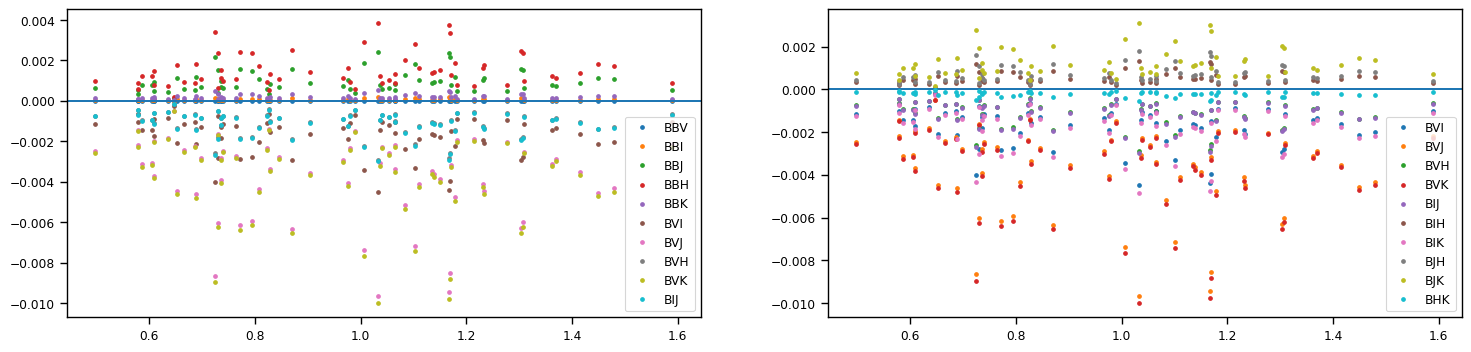

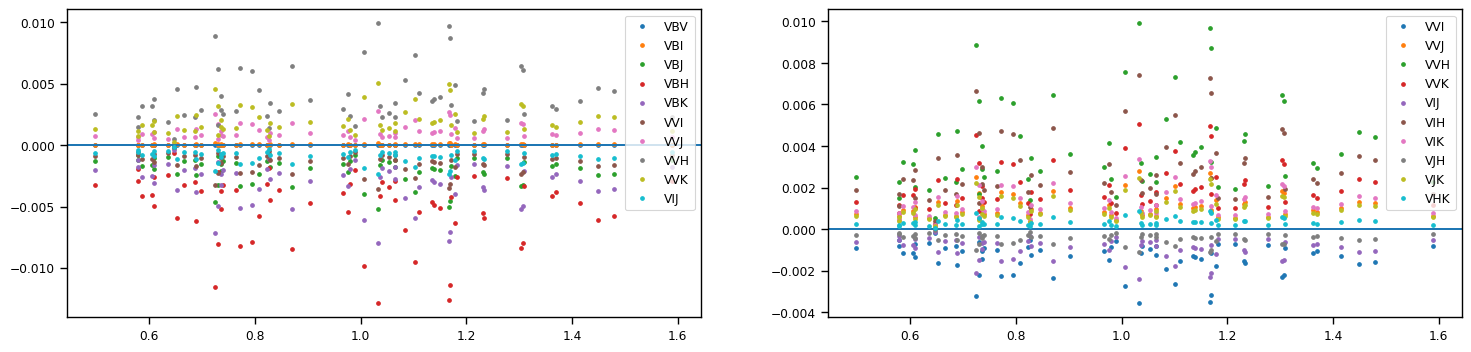

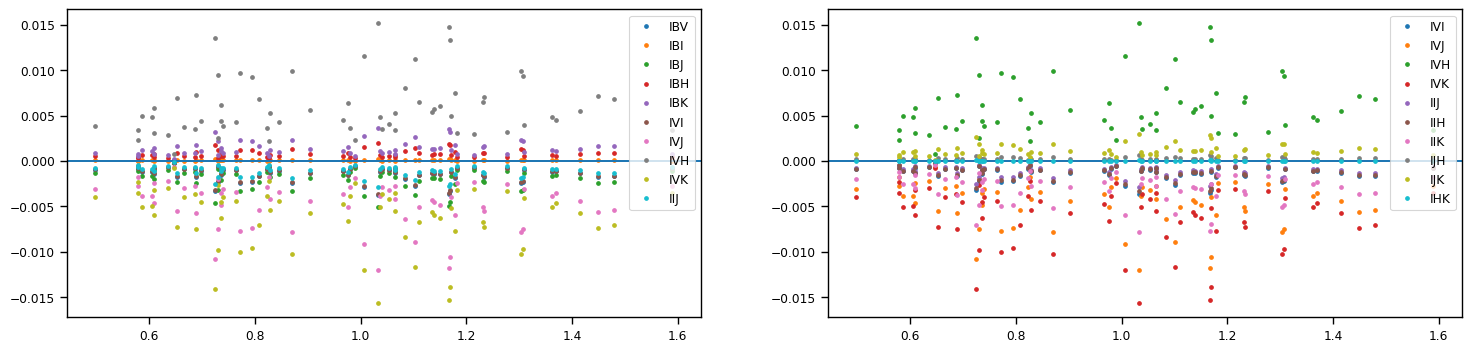

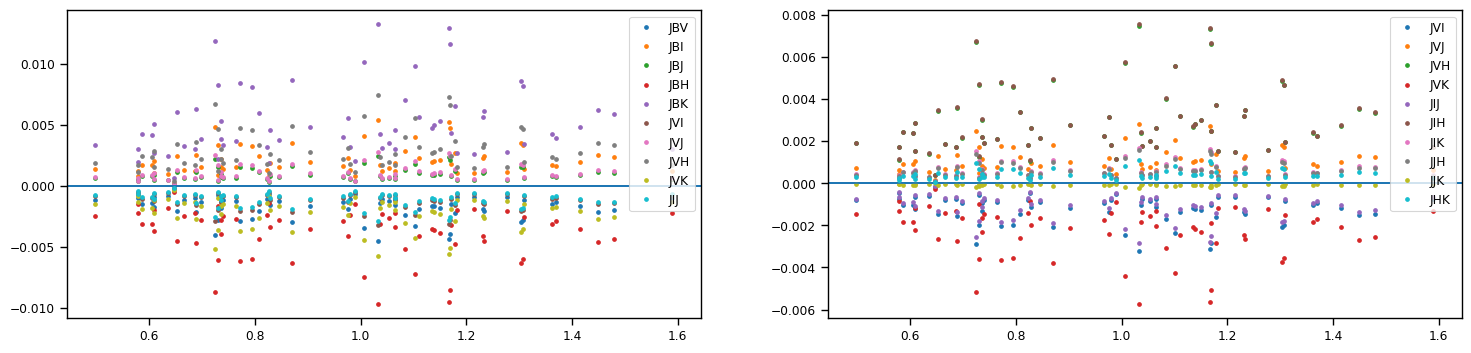

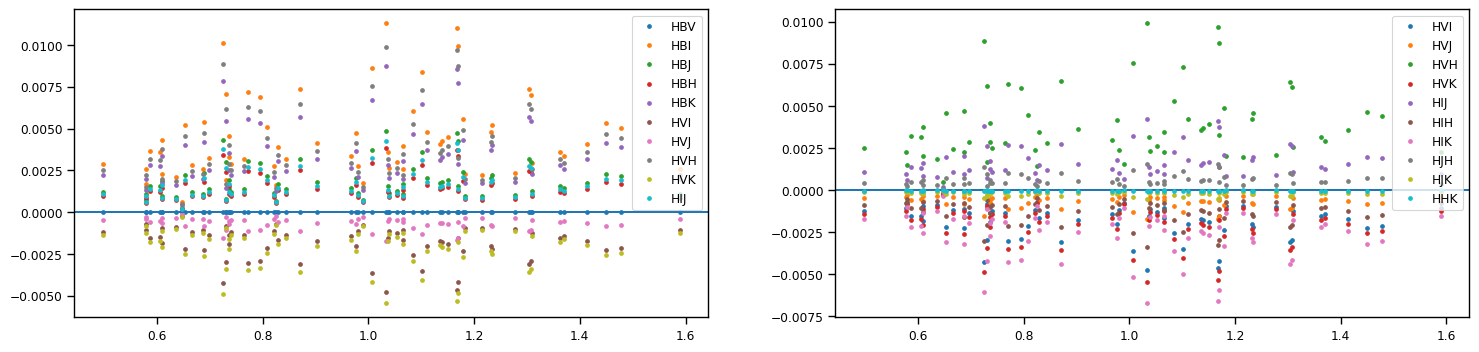

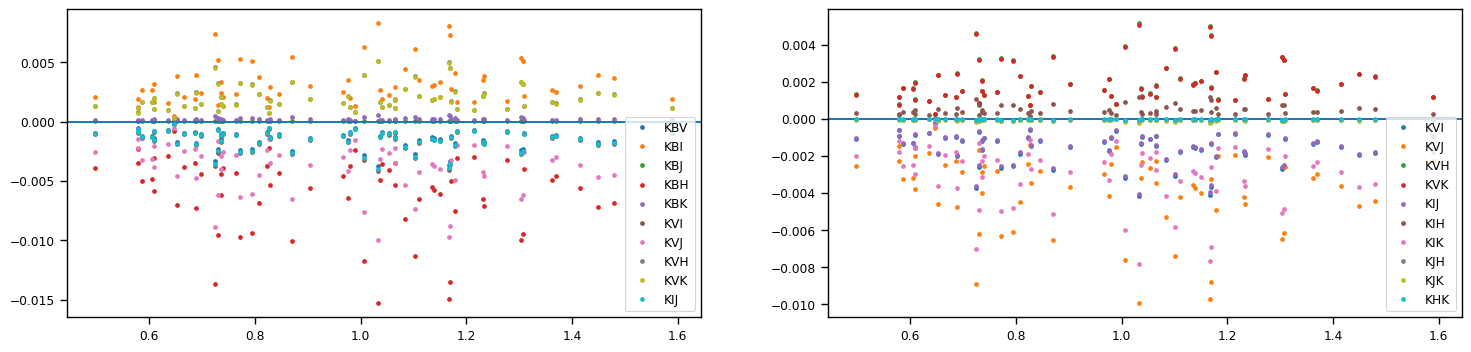

In [19]:
for m in mag: pltwes(m)
#{'B': 1.25, 'V': 1, 'R': 0.845,'I': 0.609,'J': 0.2963,'H': 0.182,'K': 0.122 } 

In [5]:
wes_show

['BV', 'BI', 'BJ', 'VI', 'VJ', 'IJ']

* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 3.23 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave (s = 1) | Autoprocess (z = 0) | Generate Plots (plots = 1)

			k : 1
			data : 65_gold
			R_v : 3.23

			Processed data will be saved in ./data/processed/65_gold_3.23/ directory. 

##########################################################################################
65_gold
./data/processed/65_gold_3.23/9_plots/1_datacleanin

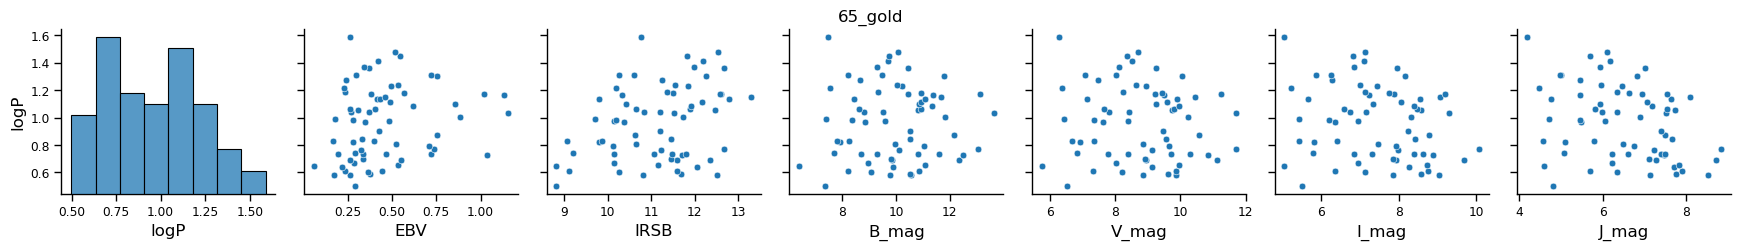

Adopting BVIJHK Extinction law and reddening ratio from Fouque (2007): 

Bands 	 Extinction 	 Reddening ratio 
 	 A(x)/A(v) 	 R(x) for E(B-V)
B 	 1.25 	 	 4.0375 

V 	 1.0 	 	 3.23 

I 	 0.609 	 	 1.9670699999999999 

J 	 0.2963 	 	 0.957049 

 
 Reddening ratio values will be multiplied with E(B-V) values to yield extinction in each band for individual Cepheid along the respective line-of-sight.  

##########################################################################################

Apparent magnitude transformed into absolute magnitude and weseheit magnitude using the Galactic extinction law, Reddenings (EBV) and Distance modulus (mu).
 M  = m - mu 
 M0 = m - mu - R*EBV 
 W  = m - mu - R*(m1-m2) 

##########################################################################################
Apparent magnitude
    name      logP    EBV    IRSB   B_mag  V_mag  I_mag  J_mag
0  SZTau  0.498166  0.295   8.814   7.365  6.526  5.517  4.827
1  QZNor  0.578244  0.263  10.811   9.756  8.869 

In [3]:
from lvtlaw.main_modules import * 
import matplotlib.pyplot as plt
from lvtlaw.a_utils import imgsave 
intro()
raw, absolute, extinction, tabsolute, wesenheit, merged_data = mag_transformation()
#PLW_mc, residue, prediction, merged_data = PLWcorrection(merged_data, plots=0) # c_pl_pw
#residue
def pltwes(m):
    fig_res, axs_res = plt.subplots(1, 2, figsize=(18, 4))
    axs_res = axs_res.flatten()
    for col in range(2):
        dev = wesenheit[f'{m}{wes_show[col]}_j']-wesenheit[f'{m}{wes_show[col]}_j0']
        axs_res[0].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[0].plot(wesenheit.logP, dev, '.', label =m+wes_show[col] + f'{dev.std():.4f}')
        dev = wesenheit[f'{m}{wes_show[col+3]}_j']-wesenheit[f'{m}{wes_show[col+5]}_j0']
        axs_res[1].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[1].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+5] + f'{dev.std():.4f}')
        #dev = wesenheit[f'{m}{wes_show[col+10]}_j']-wesenheit[f'{m}{wes_show[col+10]}_j0']
        #axs_res[2].axhline(0)#, color='red', linestyle='--', linewidth=1)
        #axs_res[2].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+10])
    axs_res[1].legend()
    axs_res[0].legend() 
    #axs_res[2].legend()
    #imgsave(m)
    plt.show()

IndexError: list index out of range

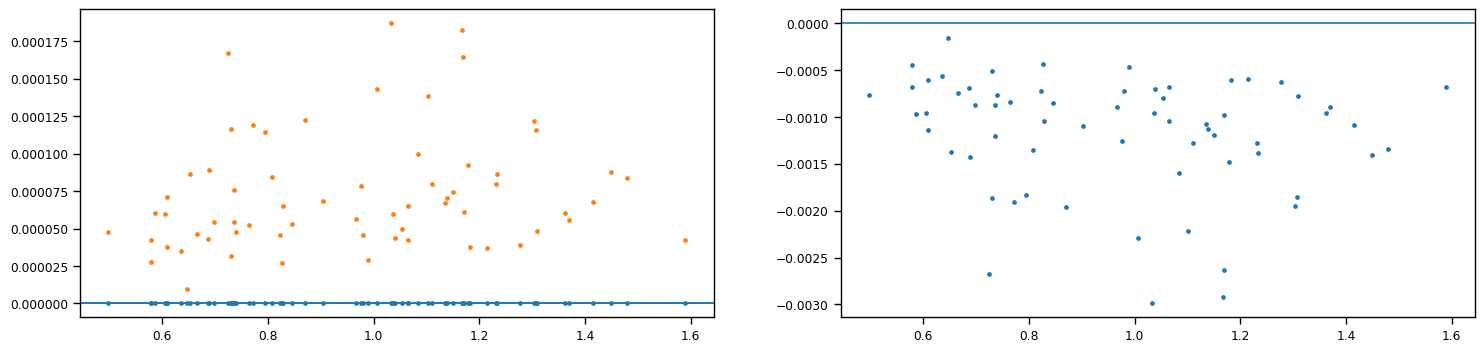

In [4]:
for m in mag: pltwes(m)

In [5]:
dmc, dres, dpre, merged_data = residual_correlation(merged_data,plots=0) # d_del_del

Starting residual correlation 

PW residuals correlated with PL residuals with two approaches. 
 i) Madore : (m vs. VVI) 
 ii) Shubham: (m vs mVI) 

	Color: BV 	Method: S
B0_j = -0.034025 BBV ( 0.018580) + -0.000000 ( 0.048384)
V0_j = 0.036078 VBV ( 0.017320) + -0.000000 ( 0.045104)
I0_j = 0.056608 IBV ( 0.028795) + 0.000000 ( 0.042072)
J0_j = 0.210940 JBV ( 0.048171) + 0.000000 ( 0.037072)
H0_j = 0.396351 HBV ( 0.056760) + 0.000000 ( 0.031394)
K0_j = 0.588971 KBV ( 0.058506) + -0.000000 ( 0.025935)
	Color: BI 	Method: S
B0_j = 0.668163 BBI ( 0.105500) + -0.000000 ( 0.038813)
V0_j = 0.595271 VBI ( 0.066829) + -0.000000 ( 0.031023)
I0_j = 0.826574 IBI ( 0.055089) + -0.000000 ( 0.020267)
J0_j = 0.955930 JBI ( 0.030070) + 0.000000 ( 0.010256)
H0_j = 0.980827 HBI ( 0.018886) + 0.000000 ( 0.006317)
K0_j = 0.993985 KBI ( 0.012487) + 0.000000 ( 0.004156)
	Color: BJ 	Method: S
B0_j = 0.938060 BBJ ( 0.088701) + 0.000000 ( 0.029807)
V0_j = 0.763379 VBJ ( 0.061459) + -0.000000 ( 0.025109)
I0_j = 

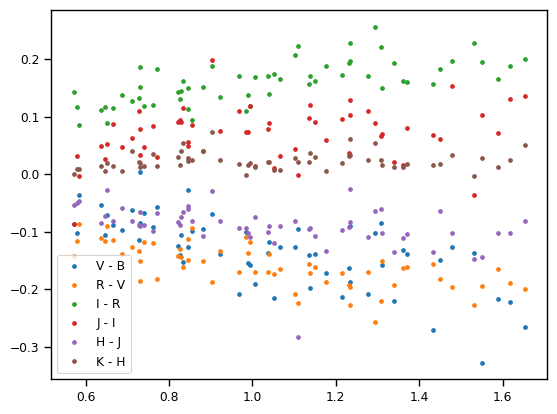

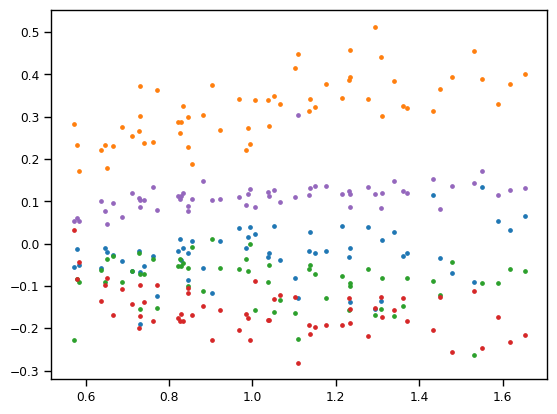

In [16]:
import matplotlib.pyplot as plt
wes=wesenheit[[f'{m}VI_h' for m in mag]+['logP']]
de=[]
for m in range(len(mag)-1):
    x = wes[f'{mag[m+1]}VI_h']-wes[f'{mag[m]}VI_h']
    plt.plot(wes['logP'], x, '.', label= f'{mag[m+1]} - {mag[m]}')
    de.append(x)
plt.legend()
plt.show()

for i in range(5):
    #print(de[i], de[i+1], mag[i]+mag[i+1])
    x = de[i+1]-de[i]
    plt.plot(wes['logP'], x, '.')


In [6]:
ex0_df, rd0_df, mu_df_list_dict, merged_data = rd_mu_error_matrix(merged_data, dmc, plots=0) # e_error_estimation

 
 Begin to decouple distance-reddening errors.
##########################################################################################
Modulus error affect reddening as following. 

 	 	 dE(mu) = dE(0) + mu*(1-rho)/R 
	where rho is the slope from residual correlation, 
	 dE(0) represents reddening error from above matrix, 
	Reddening ratio, R = Rx/(Rb - Rv)

 	mu contains 100 possibilities of modulus correction in between -1.000000 and 0.980000

Distance: _j
Wesenheit colors:
	 BV
  → For S method and color BV
      rho 	    1 - rho
    B0BBV     1.0340251518570192
    V0VBV     0.9639217517311195
    I0IBV     0.9433917319446733
    J0JBV     0.7890598378901085
    H0HBV     0.6036487633122787
    K0KBV     0.41102940077725336
  → For M method and color BV
      rho 	    1 - rho
    B0BBV     1.0340251518570192
    V0BBV     0.9639217517311195
    I0BBV     0.9809667015550323
    J0BBV     0.9754421220519011
    H0BBV     0.9724892461278756
    K0BBV     0.9754933175503679
	 BI
  

In [7]:
stars, rdmu_list, rd_mu_rms, merged_data = starwise_analysis(merged_data, mu_df_list_dict, plots=0)#########


 Reddening error for introduced modulus error 

Reddenings over mu for each star, each color and respective distance 

Data output as ./data/processed/65_gold_3.23/6_rms/65_i_stars_ex_red_mu.csv
##########################################################################################
Star: 0 | Name: SZTau 
 0       S0BV_jrd_-1.0  S0BV_jrd_-0.98  S0BV_jrd_-0.96  S0BV_jrd_-0.94  \
B         -0.401195       -0.395769       -0.390343       -0.384917   
V         -0.401195       -0.395769       -0.390343       -0.384917   
I         -0.720210       -0.710712       -0.701214       -0.691715   
J         -1.298316       -1.281641       -1.264965       -1.248290   
H         -1.629413       -1.608762       -1.588112       -1.567461   
K         -1.732409       -1.711021       -1.689634       -1.668247   
mean      -0.705229       -0.695973       -0.686717       -0.677460   
var        0.366350        0.361755        0.357161        0.352567   

      S0BV_jrd_-0.92  S0BV_jrd_-0.9  S0BV_jrd_-

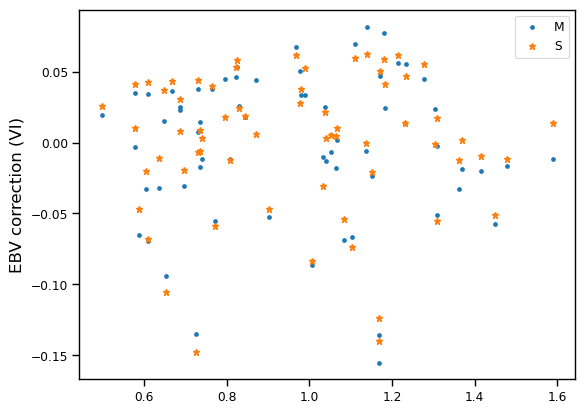

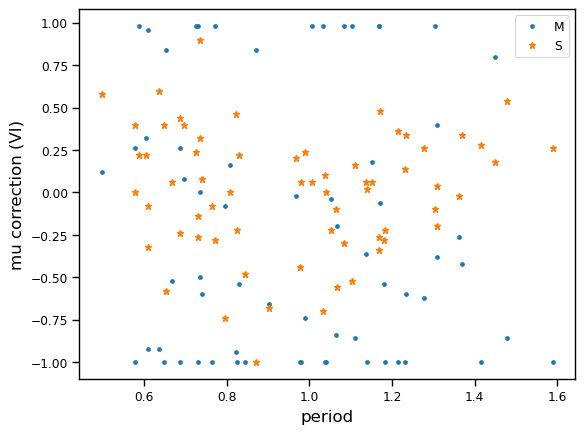

In [8]:
import matplotlib.pyplot as plt
plt.plot(rd_mu_rms.logP, rd_mu_rms.rdM0VI_j, '.', label = 'M')
plt.plot(rd_mu_rms.logP, rd_mu_rms.rdS0VI_j, '*', label = 'S')
plt.ylabel('EBV correction (VI)')
plt.legend()
plt.show()
plt.plot(rd_mu_rms.logP, rd_mu_rms.muM0VI_j, '.', label = 'M')
plt.plot(rd_mu_rms.logP, rd_mu_rms.muS0VI_j, '*', label = 'S')
plt.ylabel('mu correction (VI)')
plt.xlabel('period')
plt.legend()
plt.show()
#rd_mu_rms.style


	 Mag:  B0 	 Method:  S 	 Dis: _j
M__B0 = -1.794720 (logP - 1) ( 0.185027) + -2.969076 ( 0.050079)
MB0BV = -1.788850 (logP - 1) ( 0.051454) + -2.972631 ( 0.013926)
MB0BI = -1.781849 (logP - 1) ( 0.088602) + -2.986852 ( 0.023981)
MB0BJ = -1.779195 (logP - 1) ( 0.091026) + -2.975783 ( 0.024637)
MB0BH = -1.787973 (logP - 1) ( 0.065246) + -2.969942 ( 0.017659)
MB0BK = -1.780515 (logP - 1) ( 0.075799) + -2.971398 ( 0.020516)
MB0VI = -1.799718 (logP - 1) ( 0.031531) + -2.963906 ( 0.008534)
MB0VJ = -1.795557 (logP - 1) ( 0.074473) + -2.968129 ( 0.020157)
MB0VH = -1.782611 (logP - 1) ( 0.173596) + -2.971933 ( 0.046985)
MB0VK = -1.785600 (logP - 1) ( 0.125112) + -2.968107 ( 0.033862)
MB0IJ = -1.791919 (logP - 1) ( 0.075013) + -2.969281 ( 0.020303)
MB0IH = -1.793918 (logP - 1) ( 0.068189) + -2.968418 ( 0.018456)
MB0IK = -1.798933 (logP - 1) ( 0.046692) + -2.969224 ( 0.012637)
MB0JH = -1.795884 (logP - 1) ( 0.077759) + -2.968542 ( 0.021046)
MB0JK = -1.793738 (logP - 1) ( 0.046900) + -2.966362 ( 

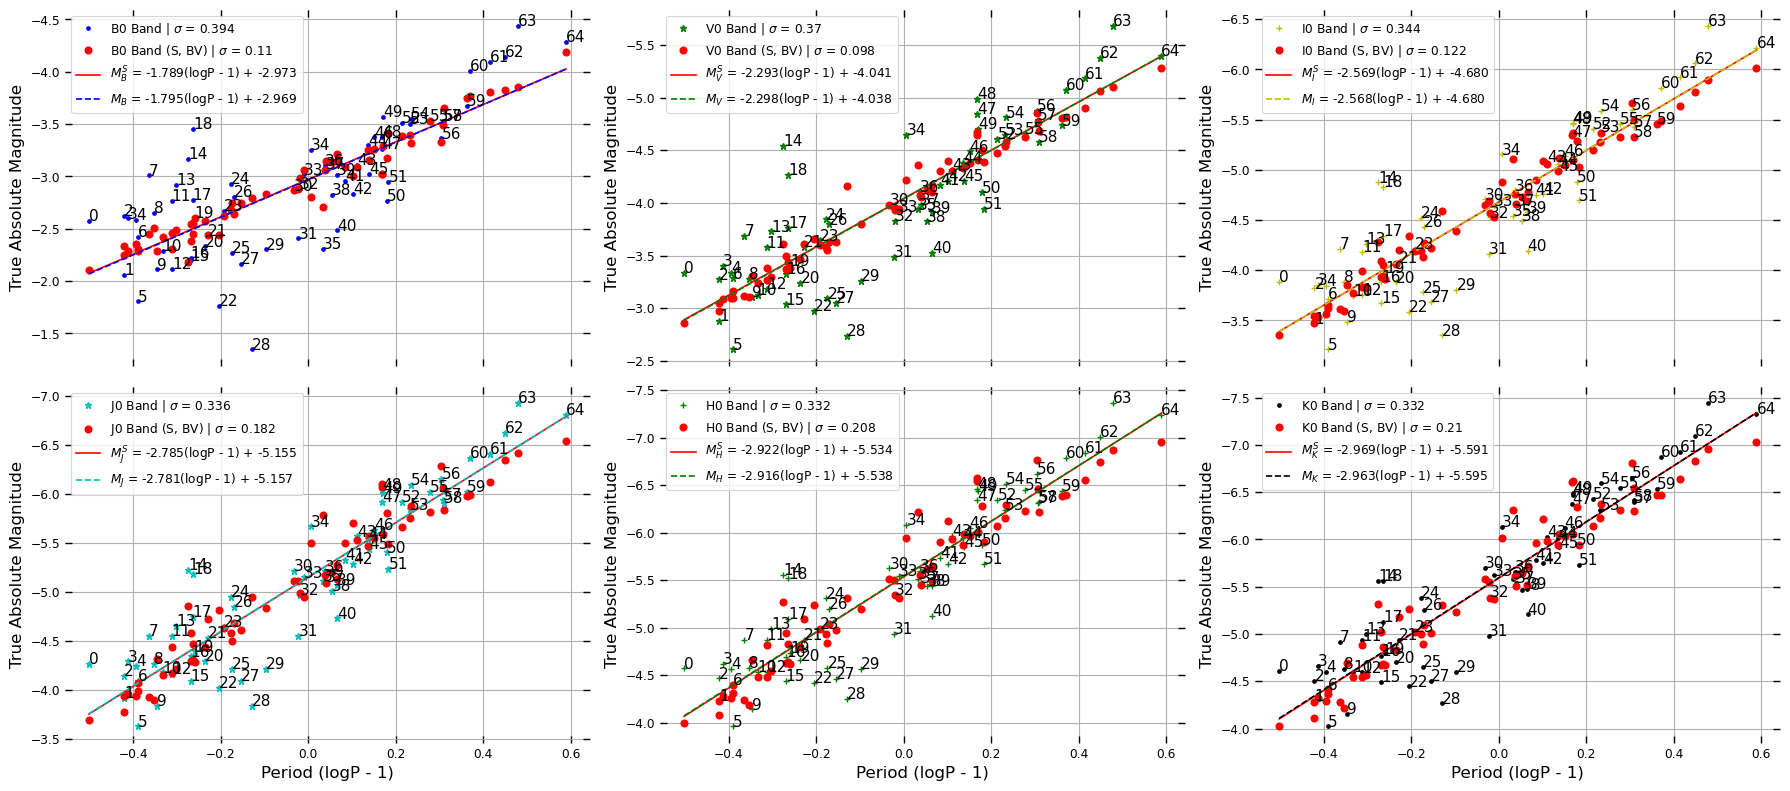

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SBI_j.pdf


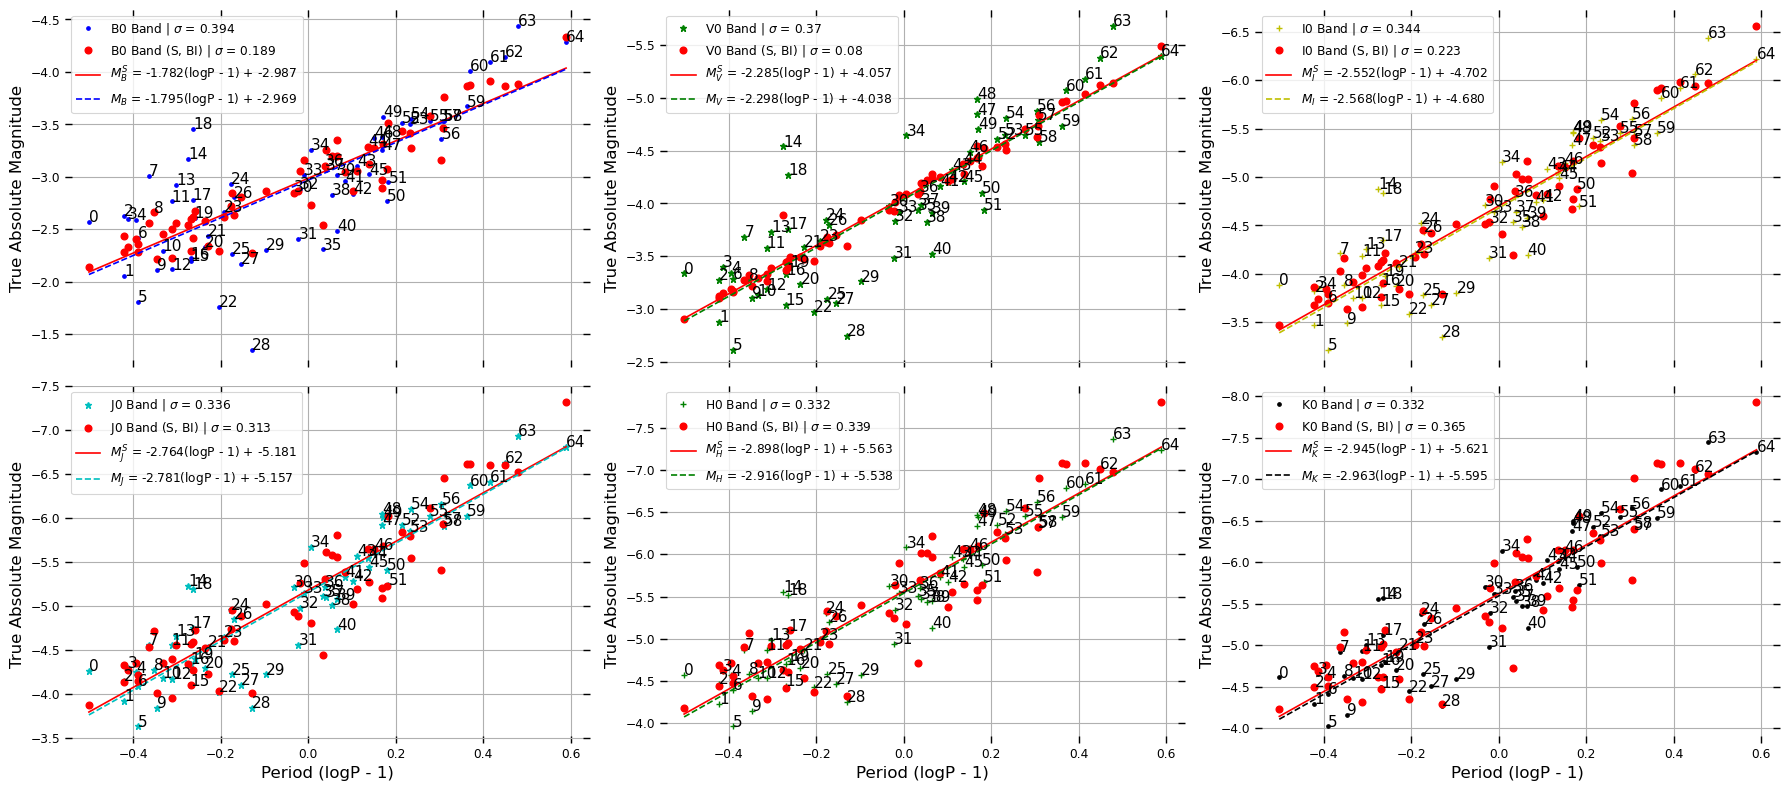

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SBJ_j.pdf


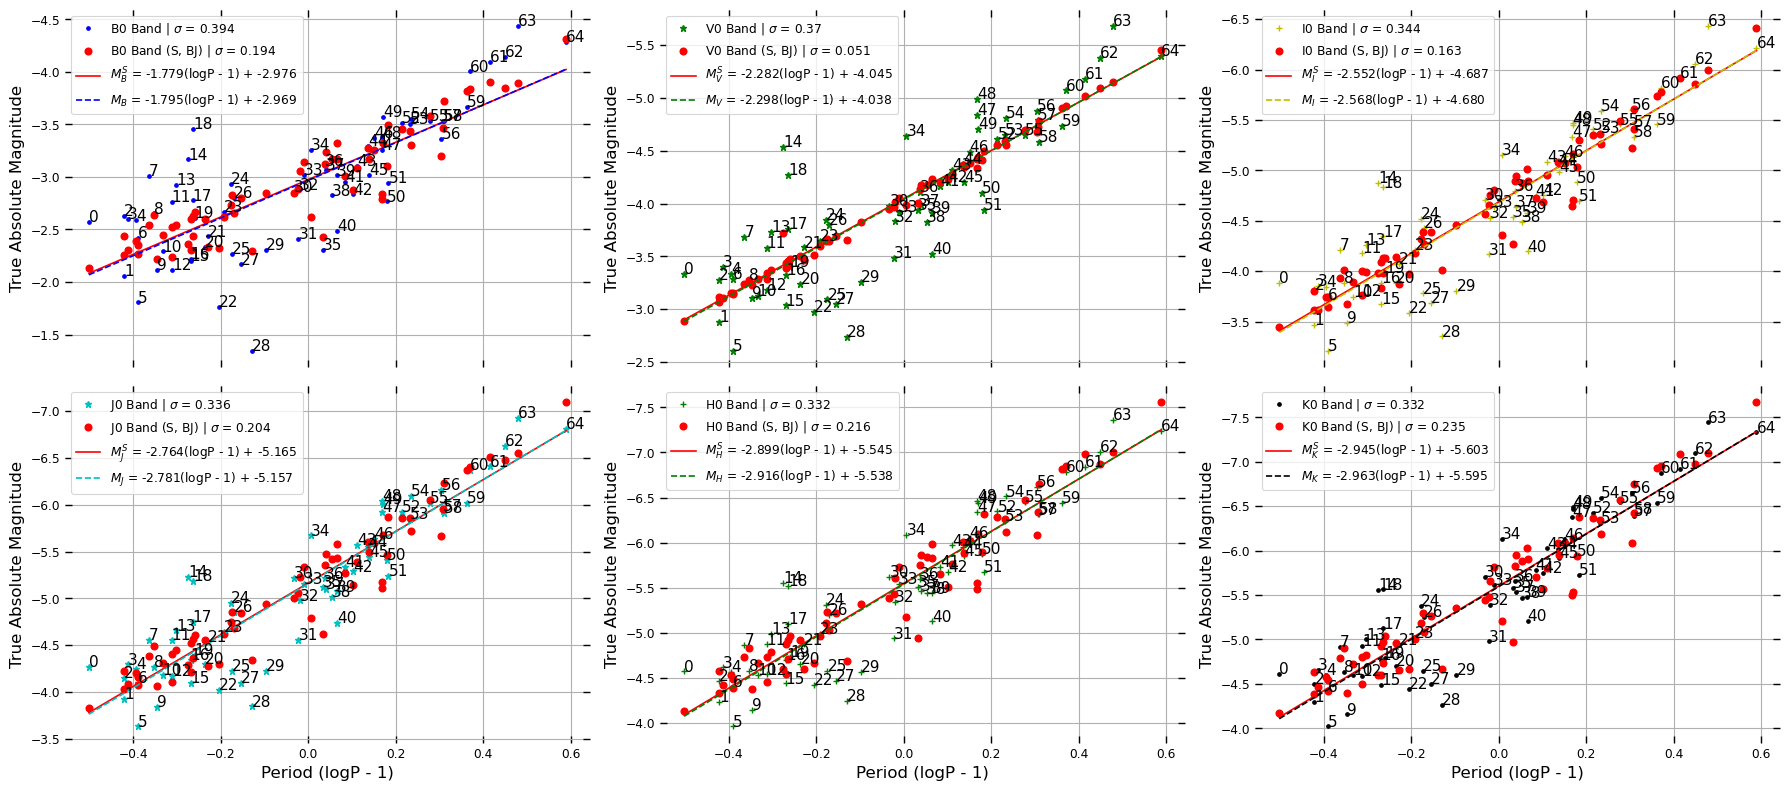

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SBH_j.pdf


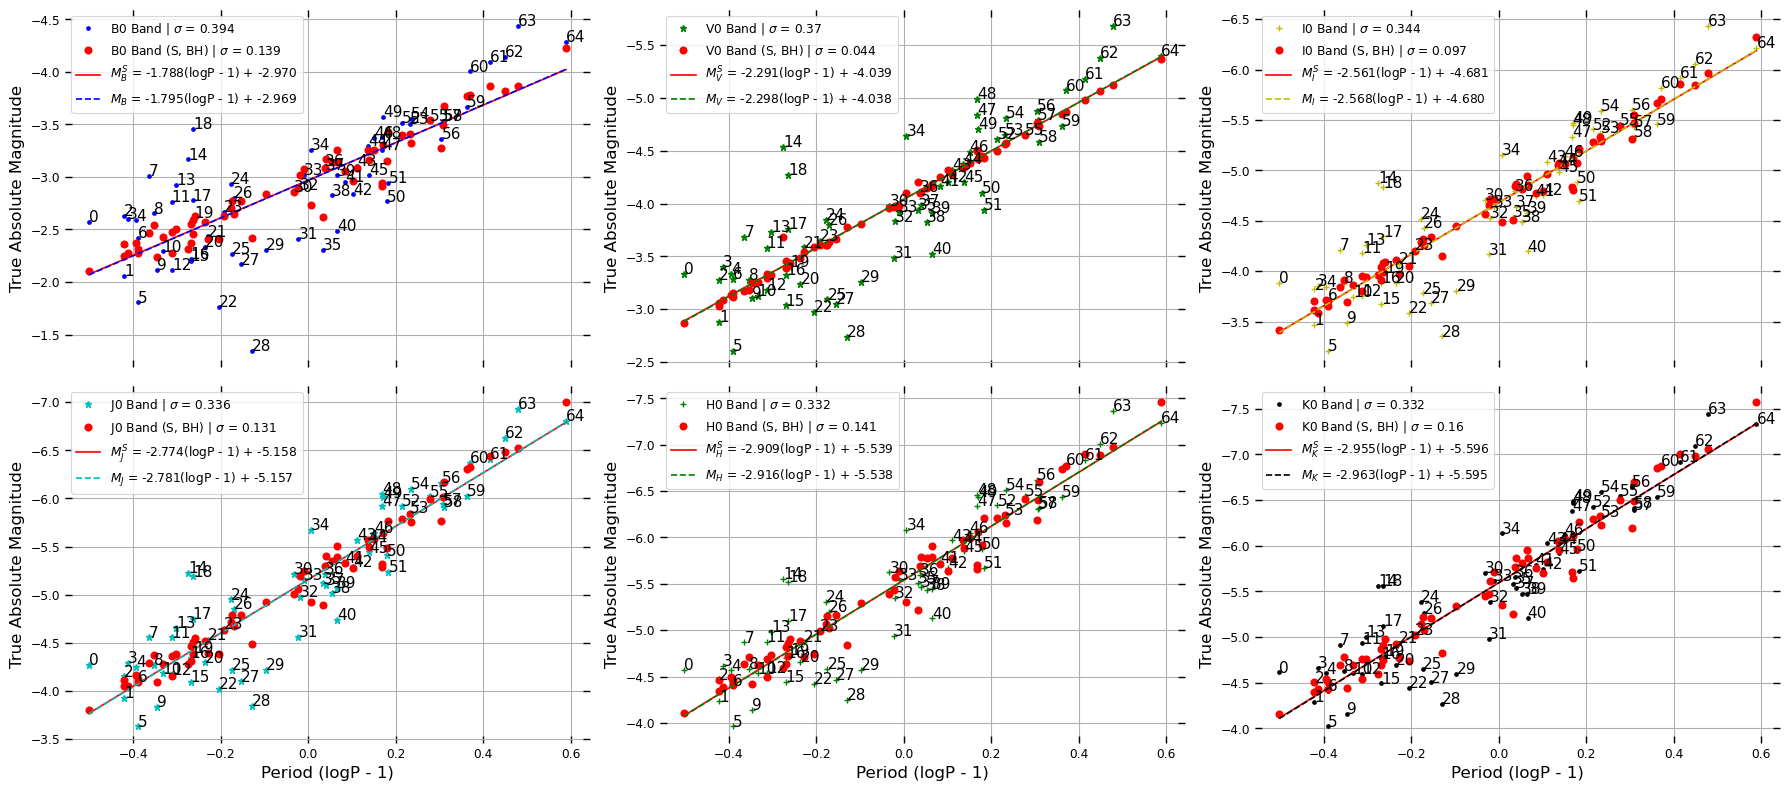

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SBK_j.pdf


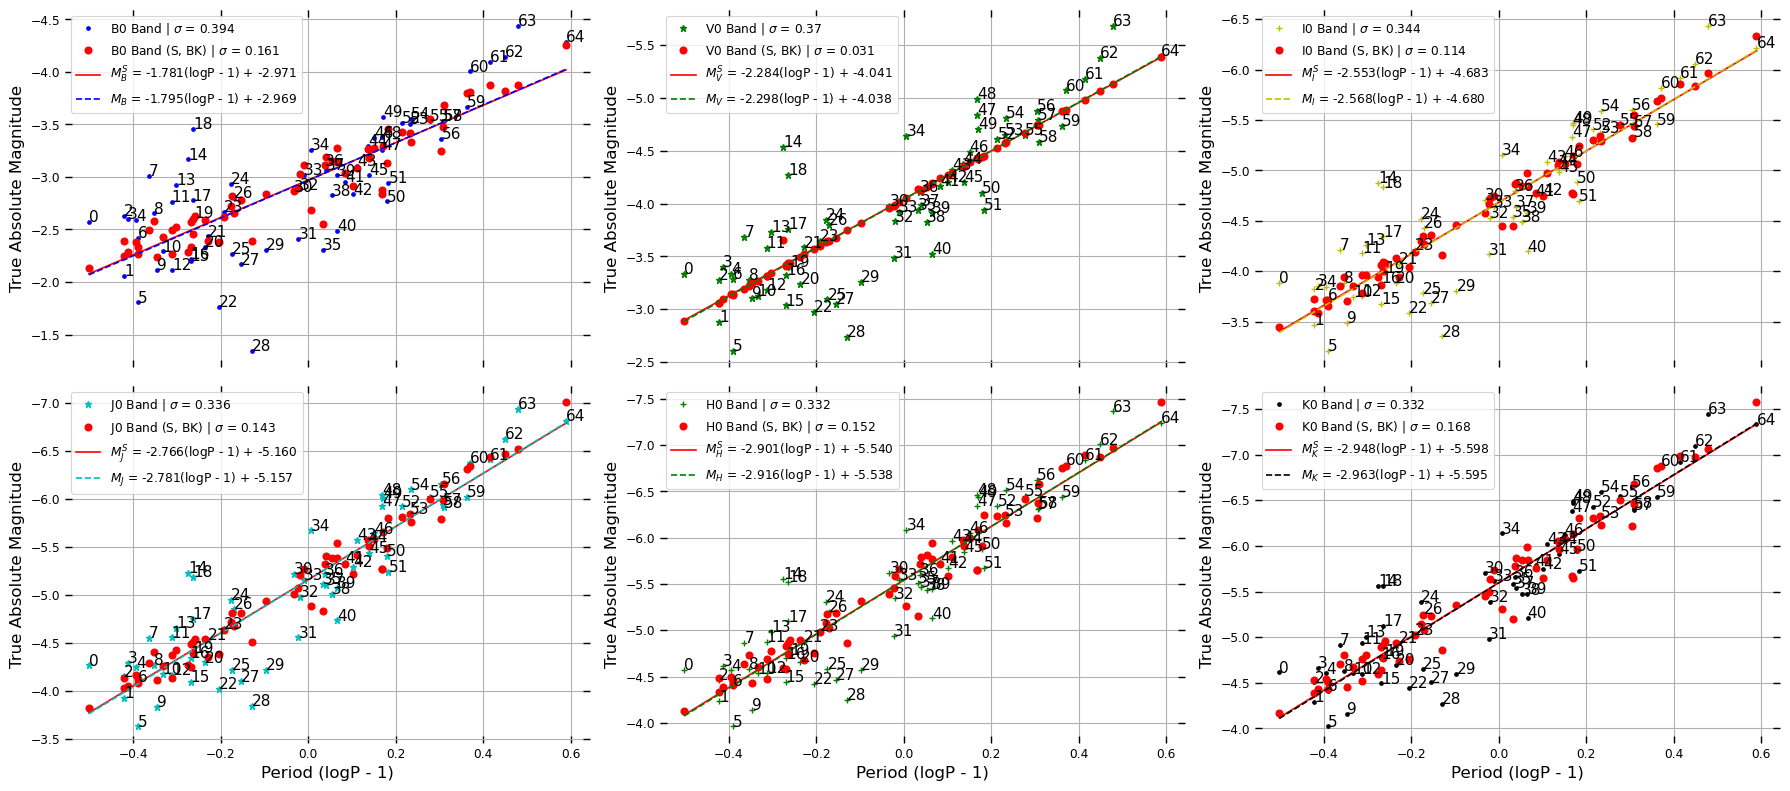

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SVI_j.pdf


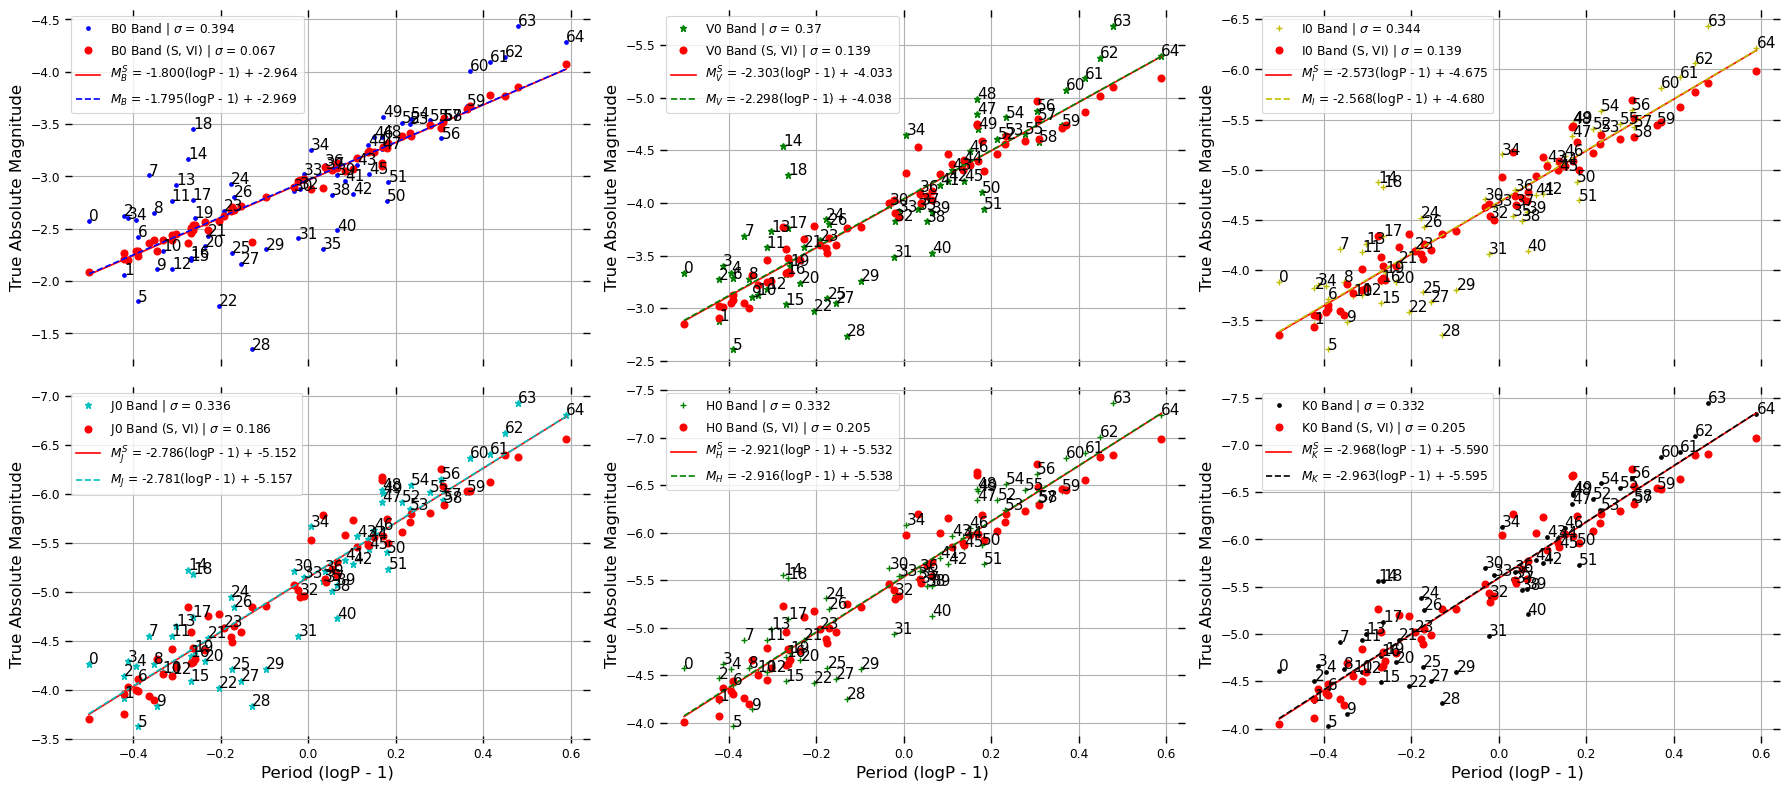

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SVJ_j.pdf


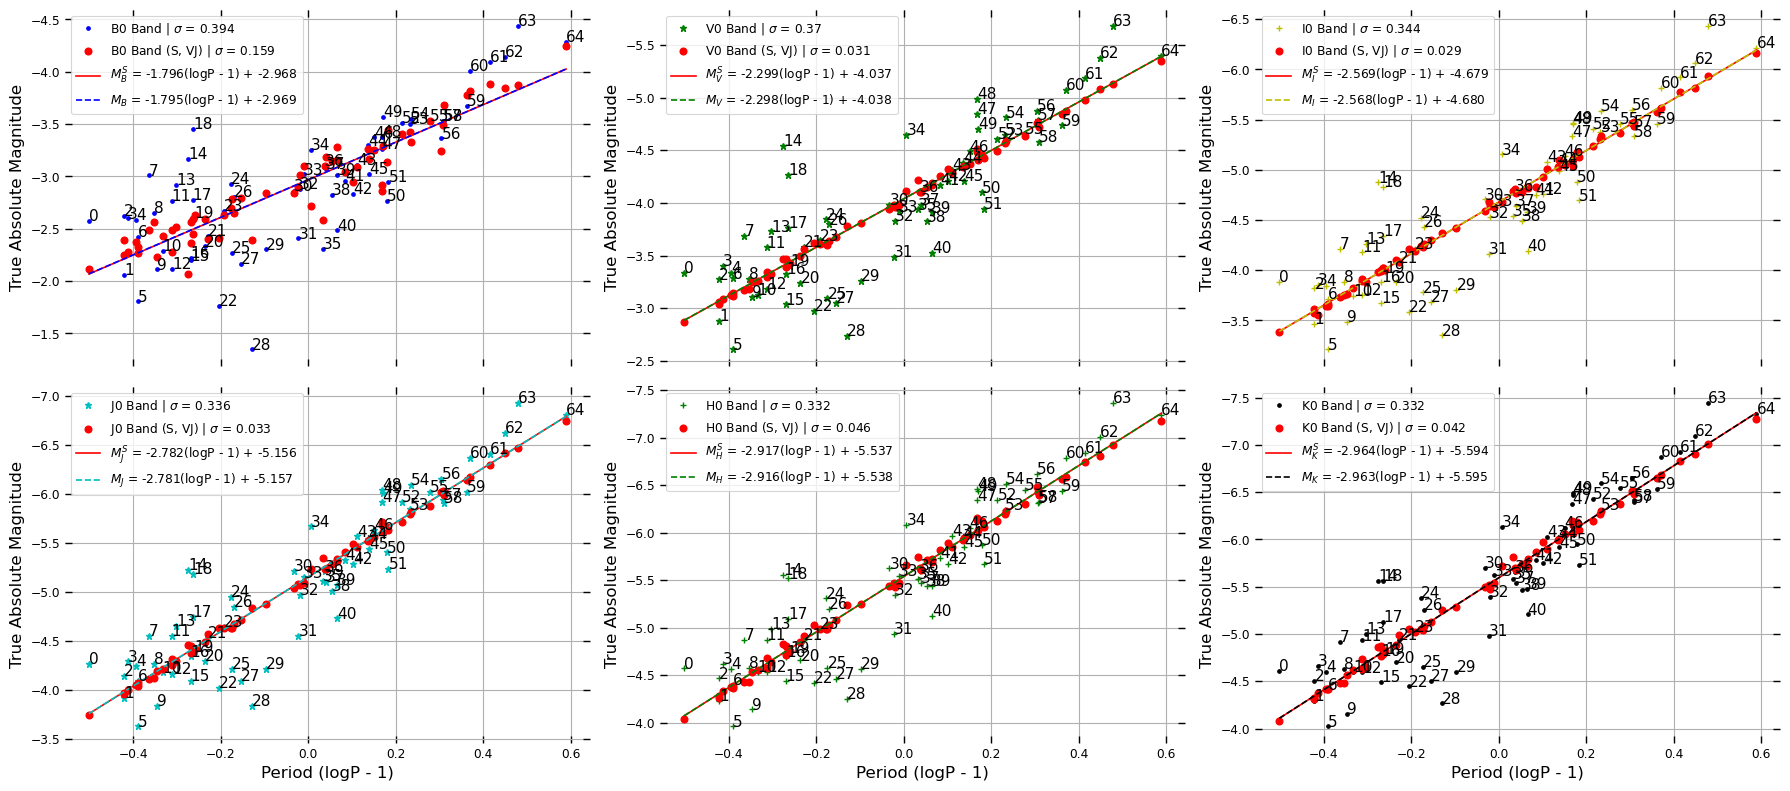

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SVH_j.pdf


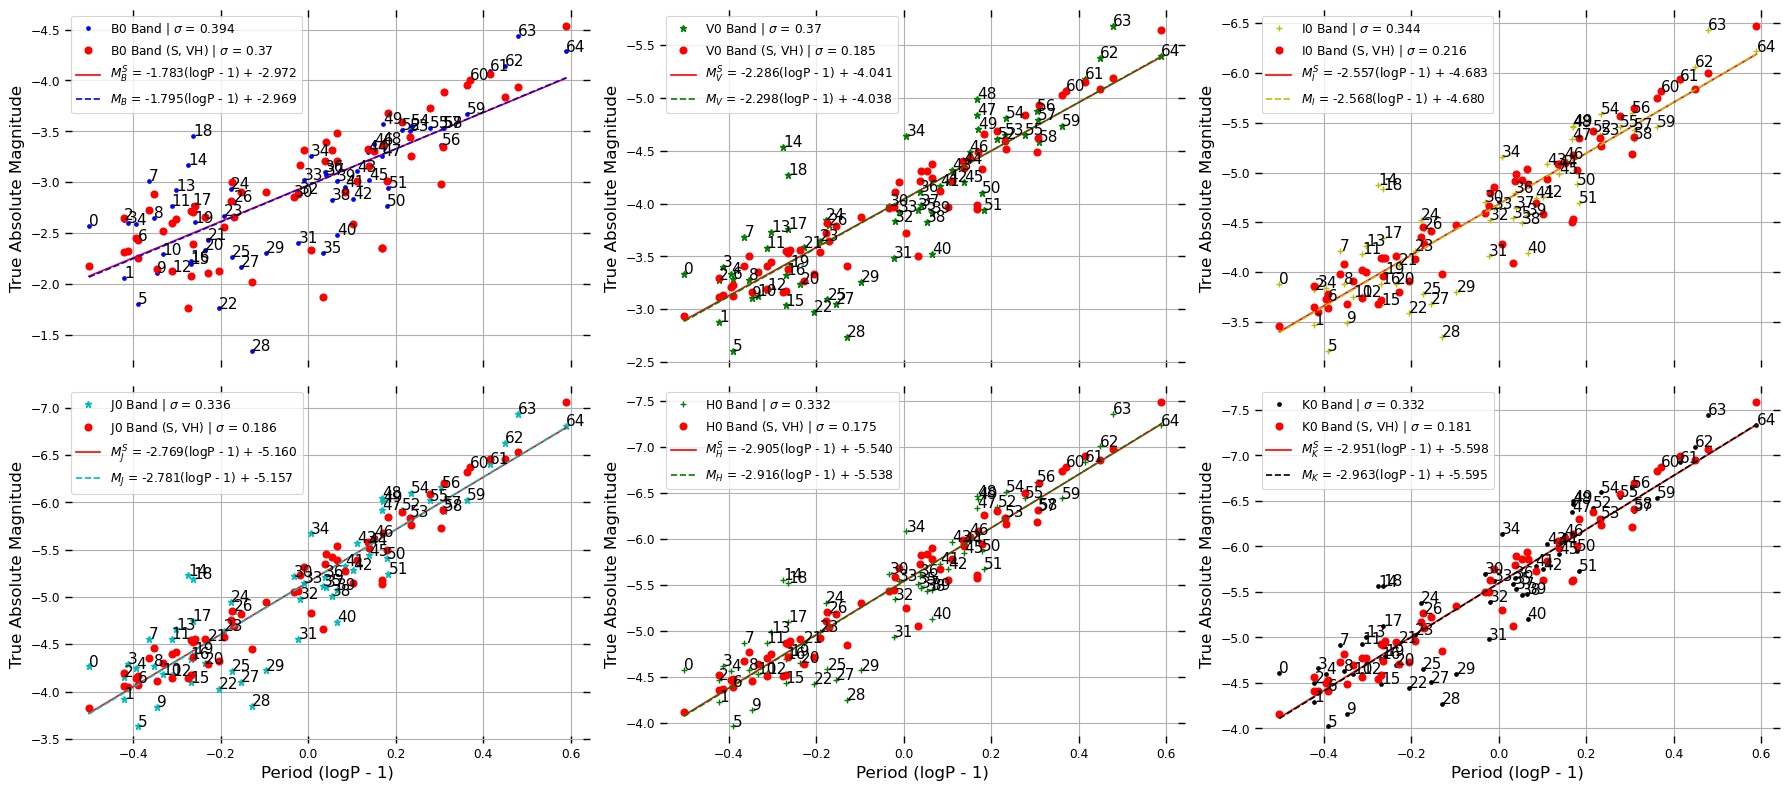

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SVK_j.pdf


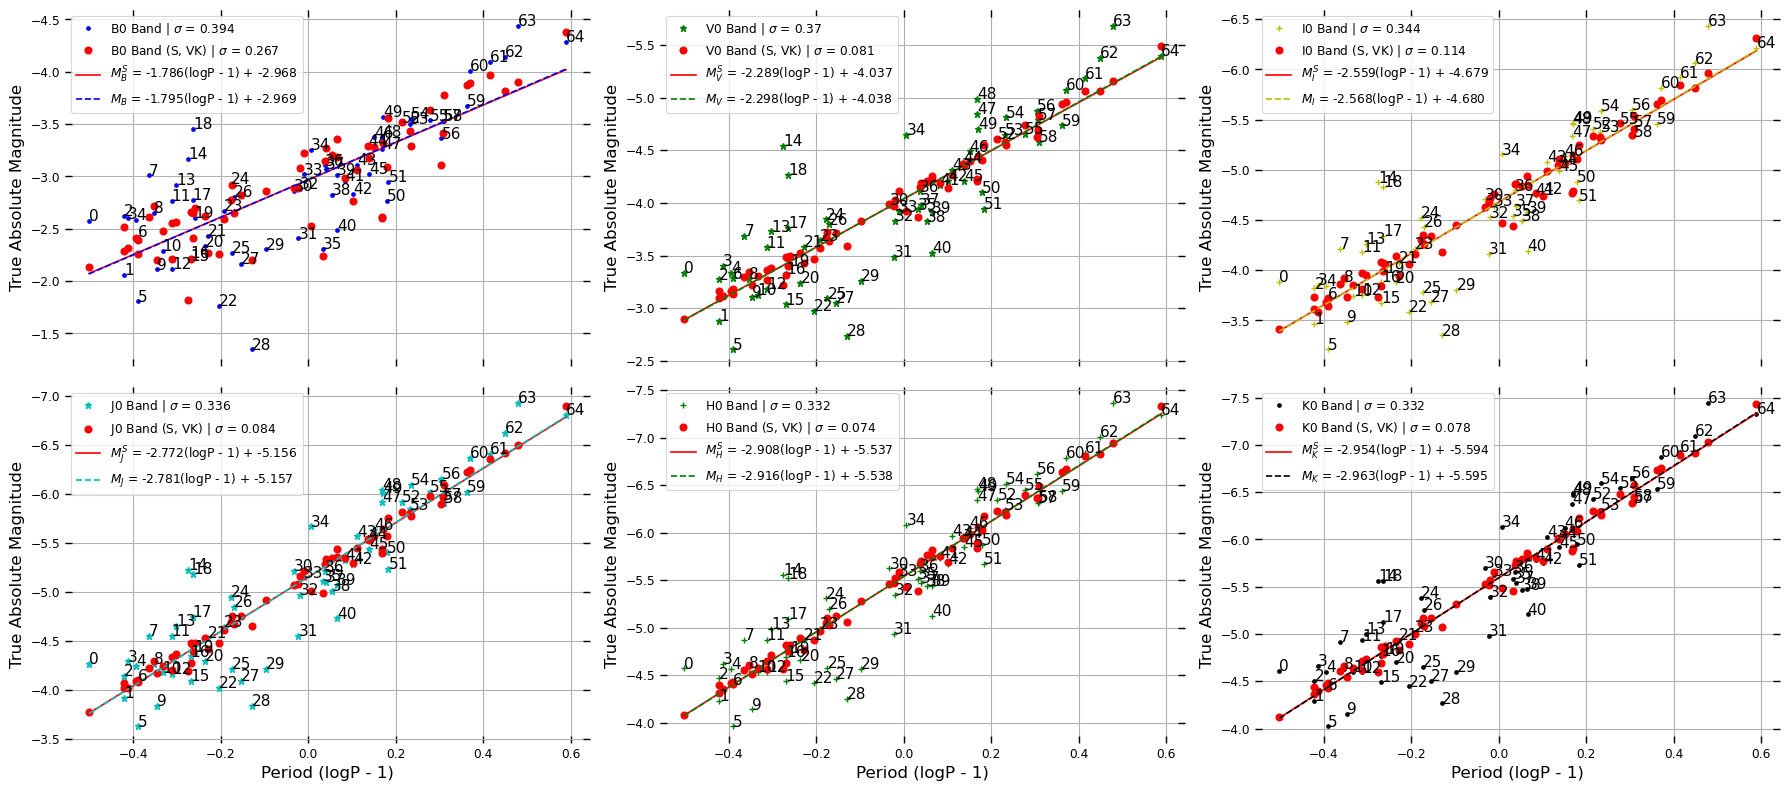

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SIJ_j.pdf


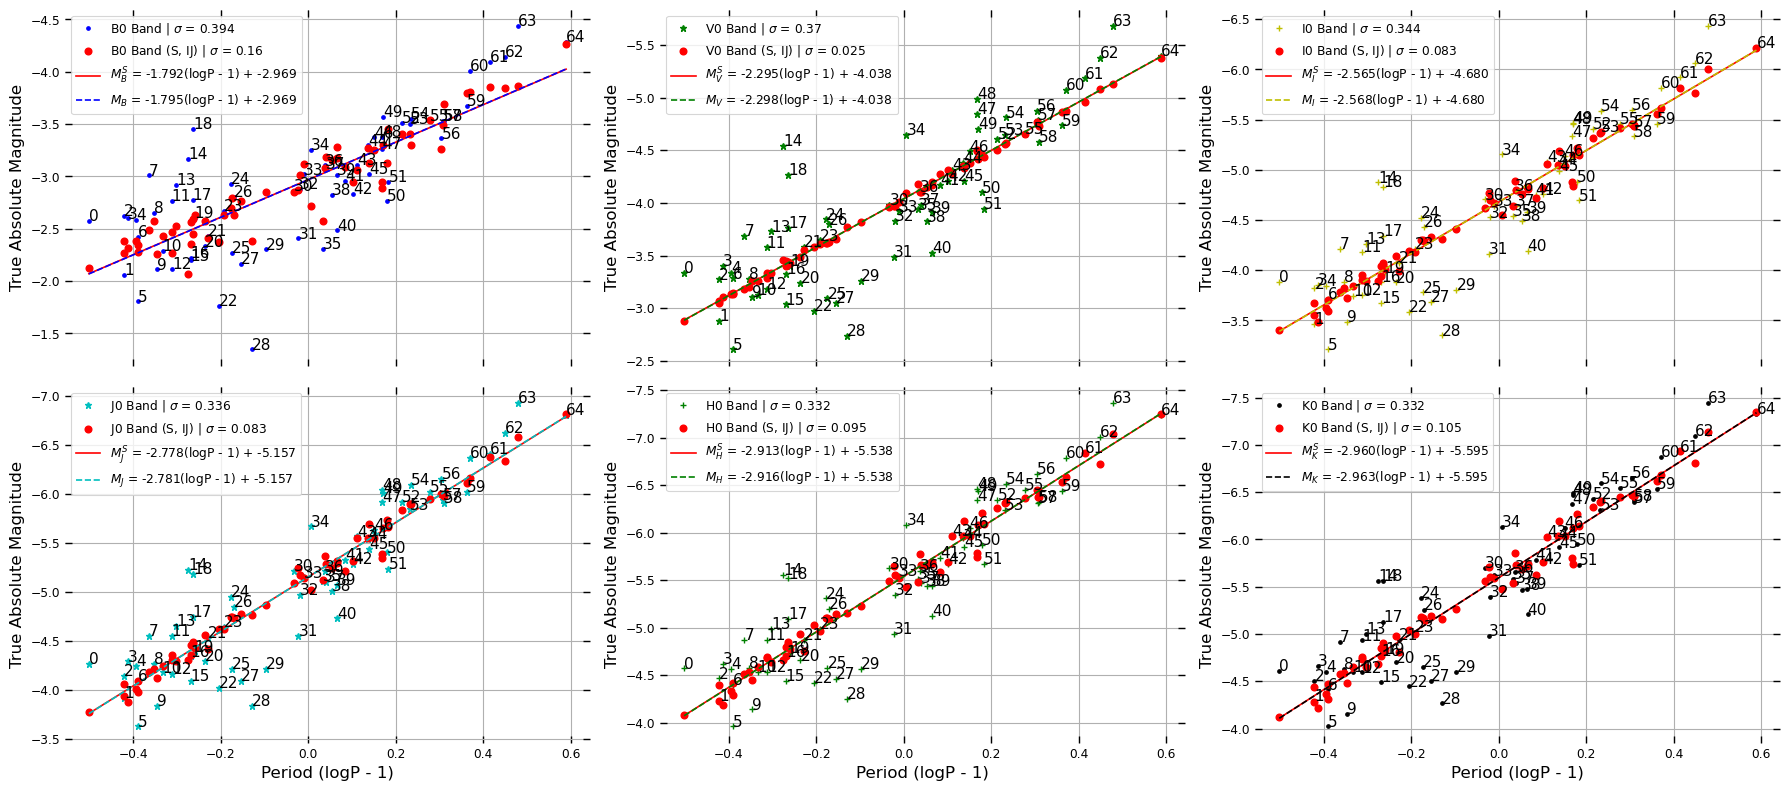

./data/processed/65_gold_3.23/9_plots/8_result/65_PL0_SIH_j.pdf


In [ ]:
corrected, merged_data = calibrated_result(merged_data, rd_mu_rms, plots=1)

In [38]:
from lvtlaw.a_utils import merge_12
cruz = pd.read_csv('data/input/20_cluster_cruz.csv')
cruzname=[]
name2=[]
for i in range(20):
    for j in range(65):
        if cruz.logP[i] == corrected.logP[j]:
            print(corrected.name[j])
            cruzname.append(i)
            name2.append(j)

cru = cruz.iloc[cruzname]
correct = corrected.iloc[name2]

m = merge_12(cru, correct, on=['logP'])

QZNor
STTau
CFCas
VLac
CVMon
XLac
VCen
CSVel
USgr
GHLup
SNor
TWNor
XPup


In [39]:
m

name      logP       mplx    IRSB   B_mag   V_mag   I_mag  K_mag    EBV  \
0   QZ Nor  0.578244  11.447721  10.706   9.756   8.869   7.865  6.619  0.263   
1   ST Tau  0.605768  10.104536  10.137   9.066   8.219   7.138  5.788  0.368   
2   CF Cas  0.687994  12.457351  12.212  12.338  11.128   9.691  7.966  0.553   
3    V Lac  0.697493  11.421236  11.321   9.816   8.921   7.866  6.587  0.335   
4   CV Mon  0.730685  11.163478  10.918  11.596  10.305   8.616  6.576  0.722   
5    X Lac  0.735997  11.421236  11.330   9.306   8.405   7.317  6.046  0.336   
6    V Cen  0.739882   9.370155   9.041   7.705   6.834   5.796  4.509  0.294   
7   CS Vel  0.771201  12.754923  12.515  13.049  11.709  10.068  8.018  0.737   
8    U Sgr  0.828997   9.042605   8.881   7.786   6.690   5.426  3.954  0.402   
9   GH Lup  0.967448  10.283022  10.563   8.844   7.637   6.364  4.813  0.347   
10   S Nor  0.989194   9.846597   9.888   7.375   6.429   5.427  4.162  0.179   
11  TW Nor  1.032868  11.877558  11.691  13.630  11.701   9.287  6.390  1.157   
12   X Pup  1.414321  12.198076  12.238   9.702   8.507   7.107  5.431  0.421   

    J_mag  ...   HM0JK_j   KM0JK_j  EBVM0HK_j  muM0HK_j   BM0HK_j   VM0HK_j  \
0   7.136  ... -3.264197 -3.321267   0.211272    10.391 -2.806709 -3.378572   
1   6.352  ... -5.562611 -5.600125   0.384713     9.889 -3.029399 -3.524656   
2   8.701  ... -5.574437 -5.617657   0.505769    11.348 -3.549758 -4.158746   
3   7.121  ... -3.972692 -4.000620   0.396256    12.440 -1.822291 -2.443192   
4   7.404  ... -5.732246 -5.790620   0.658532    10.066 -3.793551 -4.298062   
5   6.608  ... -5.801608 -5.851428   0.371794    11.520 -3.404260 -4.004664   
6   5.073  ... -5.738797 -5.797579   0.284726     8.191 -3.769244 -4.336575   
7   8.840  ... -5.888863 -5.951452   0.700969    11.675 -3.896926 -4.462890   
8   4.587  ... -4.215946 -4.275837   0.392505     9.058 -3.013161 -3.697130   
9   5.492  ... -6.613229 -6.673830   0.270948     9.721 -3.987059 -4.770457   
10  4.729  ... -6.569039 -6.636810   0.132927     8.712 -4.289352 -5.009986   
11  7.506  ... -4.568586 -4.628153   1.078568    12.509 -2.146484 -2.838446   
12  6.180  ... -7.823780 -7.913386   0.447890    11.192 -5.157599 -5.957976   

     IM0HK_j   JM0HK_j   HM0HK_j   KM0HK_j  
0  -3.984076 -4.391839 -4.682000 -4.732972  
1  -4.160871 -4.588320 -4.916373 -4.956024  
2  -4.835758 -5.213114 -5.566913 -5.612711  
3  -3.151589 -3.617184 -3.969039 -3.998219  
4  -4.992534 -5.402822 -5.734208 -5.791910  
5  -4.712556 -5.115142 -5.458509 -5.509390  
6  -4.990582 -5.404036 -5.740303 -5.798569  
7  -5.125109 -5.564092 -5.892937 -5.954130  
8  -4.440111 -4.859106 -5.205573 -5.262167  
9  -5.507806 -5.948005 -6.328329 -6.390608  
10 -5.727008 -6.195280 -6.568584 -6.636511  
11 -3.688191 -4.208210 -4.577271 -4.633863  
12 -6.858969 -7.383709 -7.822409 -7.912484  

[13 rows x 251 columns]

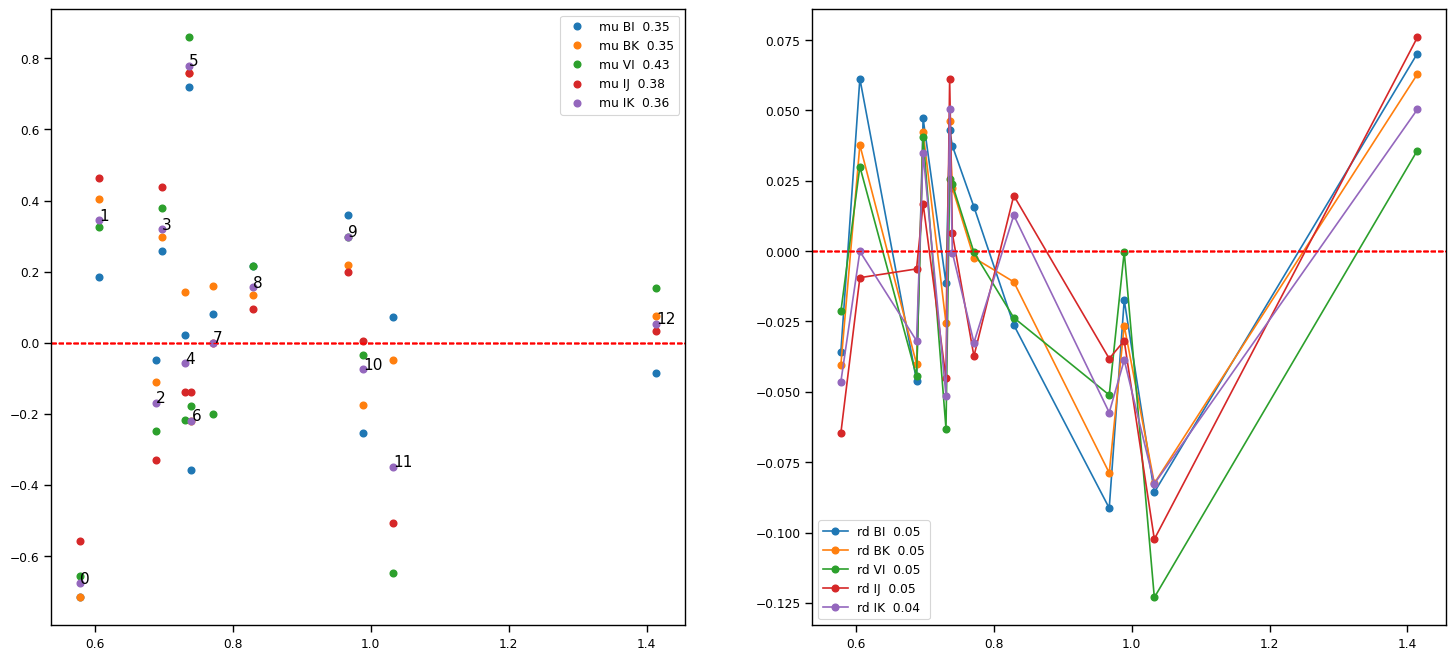

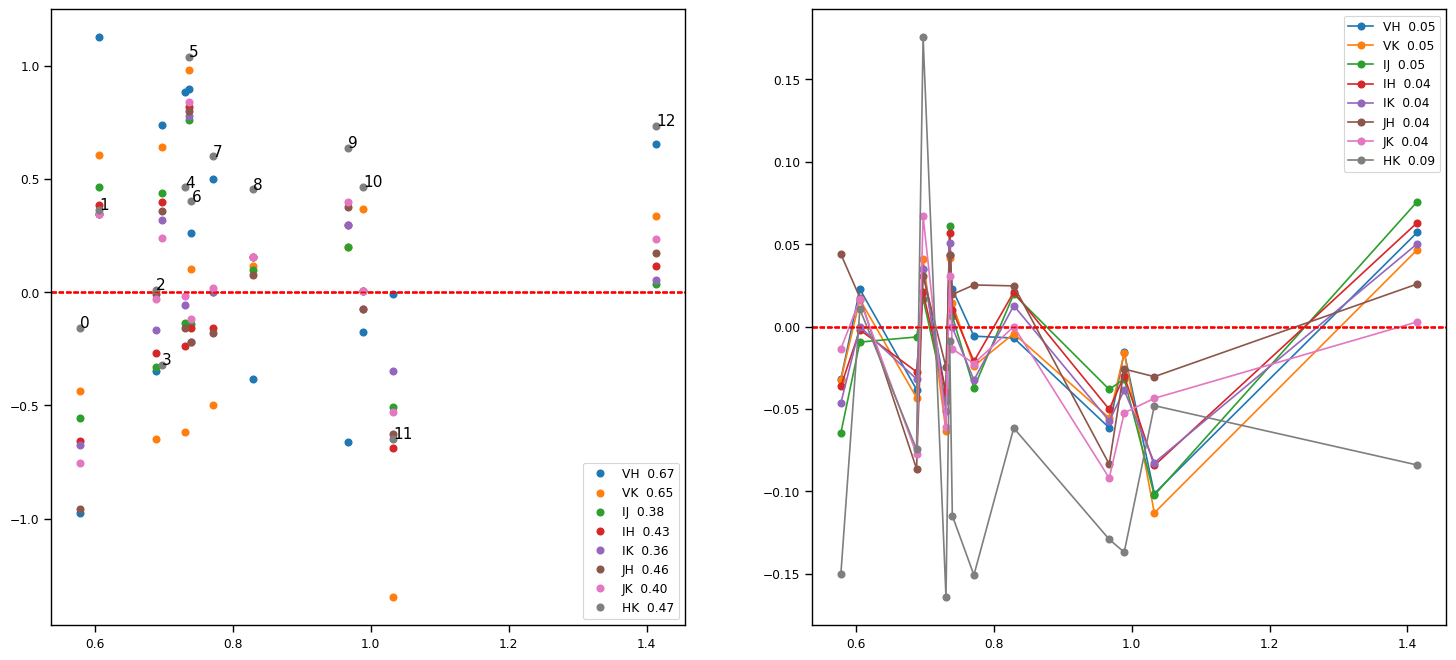

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex='col')
axs = axs.flatten()  # Flatten for easy indexing

for col in ['BI', 'BK', 'VI', 'IJ', 'IK']:#wes_show[0:7]:
    dmu = m[f'muS0{col}_j'] - m.mplx
    dst = dmu.std()
    axs[0].plot(m.logP, dmu, 'o', label = f'mu {col} {dst : .2f}')
    de = m[f'EBVS0{col}_j'] - m.EBV
    dest = de.std()
    x=m.logP
    axs[1].plot(x, de, '-o', label = f'rd {col} {dest : .2f}')
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
for k in range(len(m)):
    axs[0].annotate('%i'%(k), xy =(x.iloc[k], dmu.iloc[k]), fontsize = 11) 
axs[0].legend()
plt.legend()

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex='col')
axs = axs.flatten()  # Flatten for easy indexing

for col in wes_show[7:]:
    dmu = m[f'muS0{col}_j'] - m.mplx
    dst = dmu.std()
    axs[0].plot(m.logP, dmu, 'o', label = f'{col} {dst : .2f}')
    de = m[f'EBVS0{col}_j'] - m.EBV
    dest = de.std()
    x=m.logP
    axs[1].plot(x, de, '-o', label = f'{col} {dest : .2f}')
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
for k in range(len(m)):
    axs[0].annotate('%i'%(k), xy =(x.iloc[k], dmu.iloc[k]), fontsize = 11) 
axs[0].legend()
axs[1].legend()